In [149]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox

import sys

if ".." not in sys.path:
    sys.path.append("..")

from utils.stats import (
    print_variable_info,
)

from utils.plotting import (
    plot_series,
    box_plot,
    hist_plot,
)
from utils.const import (
    VARIABLE_COLORS,
    INTEREST_VARS,
)

## Lectura de Datos

In [150]:
df_norte2 = pd.read_csv(
    "../01_complete_datasets/NORTE2_2020_2023.csv", parse_dates=["date"]
)
df_norte2.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,69.0,62.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,0.60,0.5,NaN,NaN,NaN,49.0,NaN,715.6,0.00,92.0,18.6,0.0,11.20,6.3,30.0
2,2020-01-01 02:00:00,0.36,0.5,NaN,NaN,NaN,53.0,NaN,714.6,0.00,92.0,18.9,0.0,11.21,2.6,128.0
3,2020-01-01 03:00:00,0.44,0.5,NaN,NaN,NaN,51.0,38.0,714.2,0.00,92.0,19.1,0.0,11.36,2.6,79.0
4,2020-01-01 04:00:00,0.35,0.5,NaN,NaN,NaN,50.0,NaN,713.8,0.01,92.0,19.1,0.0,11.34,2.3,85.0


In [151]:
df_noroeste2 = pd.read_csv(
    "../01_complete_datasets/NOROESTE2_2020_2023.csv", parse_dates=["date"]
)


df_noroeste2.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,92.0,86.93,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,1.69,NaN,NaN,NaN,NaN,54.0,NaN,703.3,0.0,89.0,NaN,0.002,10.19,3.8,138.0
2,2020-01-01 02:00:00,1.55,NaN,NaN,NaN,NaN,84.0,71.93,702.4,0.0,89.0,NaN,0.002,10.13,6.9,91.0
3,2020-01-01 03:00:00,1.50,NaN,NaN,NaN,NaN,NaN,64.91,702.0,0.0,89.0,NaN,0.002,10.13,3.5,70.0
4,2020-01-01 04:00:00,1.47,NaN,NaN,NaN,NaN,52.0,NaN,701.7,0.0,89.0,NaN,0.002,10.20,3.5,96.0


In [152]:
df_sureste3 = pd.read_csv(
    "../01_complete_datasets/SURESTE3_2020_2023.csv", parse_dates=["date"]
)
df_sureste3.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,37.0,18.0,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,1.88,2.0,5.2,7.2,25.0,37.0,28.0,734.2,0.01,93.0,NaN,0.037,11.68,1.7,98.0
2,2020-01-01 02:00:00,1.86,2.6,5.0,7.6,22.0,55.0,28.0,733.8,0.02,93.0,NaN,0.037,11.68,1.6,133.0
3,2020-01-01 03:00:00,1.78,3.1,5.9,8.9,21.0,35.0,11.0,733.0,0.00,93.0,NaN,0.037,11.70,1.5,198.0
4,2020-01-01 04:00:00,1.76,2.0,4.5,6.5,22.0,27.0,NaN,732.8,0.02,93.0,NaN,0.037,11.80,0.7,240.0


In [153]:
zones_df: dict = {
    "NORTE2": df_norte2,
    "SURESTE3": df_sureste3,
    "NOROESTE2": df_noroeste2,
}

# Filtro Fecha > 1 Marzo 2021

In [154]:
# Nada más se toman los datos desde Marzo de 2021 porque las zonas que escogimos tienen muchos valores nulos. Especialmente para O3 y PM2.5

df_norte2_filtered = df_norte2[df_norte2["date"] > "2021-03-01"]
df_noroeste2_filtered = df_noroeste2[df_noroeste2["date"] > "2021-03-01"]
df_sureste3_filtered = df_sureste3[df_sureste3["date"] > "2021-03-01"]

df_sureste3_filtered.to_csv("../processed_datasets/SURESTE3_2021_2023.csv", index=False)
df_noroeste2_filtered.to_csv(
    "../processed_datasets/NOROESTE2_2021_2023.csv", index=False
)
df_norte2_filtered.to_csv("../processed_datasets/NORTE2_2021_2023.csv", index=False)


df_norte2_filtered.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
10193,2021-03-01 01:00:00,2.30,6.7,19.2,21.8,16.0,NaN,2.0,709.4,0.0,57.0,1.1,0.0,24.80,5.3,93.0
10194,2021-03-01 02:00:00,2.30,11.5,19.6,27.1,9.0,NaN,NaN,709.4,0.0,61.0,NaN,0.0,23.91,5.7,43.0
10195,2021-03-01 03:00:00,2.30,9.7,26.0,31.7,4.0,NaN,NaN,709.2,0.0,65.0,NaN,0.0,23.11,2.6,322.0
10196,2021-03-01 04:00:00,2.32,15.1,25.4,36.5,3.0,NaN,NaN,709.2,0.0,66.0,NaN,0.0,22.43,1.6,297.0
10197,2021-03-01 05:00:00,2.30,18.8,23.3,38.1,3.0,NaN,NaN,709.3,0.0,68.0,NaN,0.0,21.73,1.6,151.0


## Imputación de Valores (para nulos)
y también para horas faltantes que no están en el data set original crudo

In [155]:
# # Rango de fechas desde 1 marzo 2022 hasta 17 agosto de 2023
# date_range = (
#     pd.date_range("03/01/2021 01:00:00 a. m.", "17/08/2023  11:00:00 p. m.", freq="h")
#     .to_series()
#     .reset_index(drop=True)
# )

# date_range.name = "date"
# date_range = date_range.to_frame()
# date_range

In [156]:
# def imputar_fechas(df: pd.DataFrame):
#     date_range = (
#         pd.date_range(
#             "03/01/2021 01:00:00 a. m.", "17/08/2023  11:00:00 p. m.", freq="h"
#         )
#         .to_series()
#         .reset_index(drop=True)
#     )

#     date_range.name = "date"
#     date_range = date_range.to_frame()

#     print(date_range.loc[~date_range["date"].isin(df["date"])])

#     # Se imputan las fechas que faltan en el dataset con valores nulos para después llenarlos
#     return pd.merge(
#         df,
#         date_range.loc[~date_range["date"].isin(df["date"])],
#         on="date",
#         how="outer",
#     ).sort_values("date")

In [157]:
# df_norte2_fechas = imputar_fechas(df_norte2_filtered)
# df_noroeste2_fechas = imputar_fechas(df_noroeste2_filtered)
# df_sureste3_fechas = imputar_fechas(df_sureste3_filtered)

# df_noroeste2_fechas

In [158]:
def Imputacion_datos(datos: pd.DataFrame, columna: str) -> pd.DataFrame:
    try:
        datos["Datos anteriores"] = datos[columna].ffill()
    except:
        datos["Datos anteriores"] = datos[columna].bfill()
    datos["Datos siguientes"] = datos[columna].bfill()

    datos["Promedio"] = datos[["Datos anteriores", "Datos siguientes"]].mean(axis=1)

    return datos["Promedio"]

In [159]:
def Imputar_datos(datos):
    df = datos.copy()
    for variable in datos.drop(["date"], axis=1).columns:
        df[variable] = Imputacion_datos(datos, variable)
    return df

In [160]:
# Se rellenan los valores nulos utilizando el método backfill
# Se checa cual es el siguiente valor no nulo y se que con el
df_norte2_imputado = Imputar_datos(df_norte2_filtered)
df_noroeste2_imputado = Imputar_datos(df_noroeste2_filtered)
df_sureste3_imputado = Imputar_datos(df_sureste3_filtered)

df_noroeste2_imputado

C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Datos anteriores'] = datos[columna].ffill()
C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Datos siguientes'] = datos[columna].bfill()
C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Promedio'] = datos[[
C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Datos anteriores'] = datos[columna].ffill()
C:\Users\Franco Mendoza\AppData\Local\Temp\ipykernel_11124\577272459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
10193,2021-03-01 01:00:00,2.72,134.40,0.60,134.50,18.0,79.0,16.08,698.5,0.0,60.0,15.7,0.0,22.74,1.40,11.0
10194,2021-03-01 02:00:00,2.69,134.40,0.60,134.50,17.0,67.0,21.31,698.3,0.0,63.0,15.7,0.0,21.60,1.40,9.0
10195,2021-03-01 03:00:00,2.58,134.40,0.60,134.50,17.0,51.0,16.03,698.3,0.0,66.0,15.8,0.0,20.89,1.40,10.0
10196,2021-03-01 04:00:00,2.63,134.40,0.60,134.50,15.0,47.0,16.33,698.2,0.0,68.0,15.6,0.0,20.33,1.65,11.0
10197,2021-03-01 05:00:00,2.58,132.95,0.65,133.05,14.0,49.0,15.97,698.4,0.0,67.0,15.1,0.0,20.15,1.90,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,2023-08-17 19:00:00,0.30,2.90,8.70,11.60,39.0,109.0,7.41,698.1,0.0,21.0,2.1,0.0,35.28,15.90,87.0
31786,2023-08-17 20:00:00,0.33,2.90,10.50,13.40,32.0,102.0,7.41,698.4,0.0,22.0,2.0,0.0,34.24,15.80,87.0
31787,2023-08-17 21:00:00,0.34,3.40,15.90,19.30,25.0,97.0,7.41,698.8,0.0,22.0,2.0,0.0,33.37,14.50,85.0
31788,2023-08-17 22:00:00,0.43,4.80,23.00,27.80,15.0,103.0,7.41,699.3,0.0,24.0,2.0,0.0,32.70,12.60,87.0


In [161]:
df_norte2_imputado.to_csv(
    "../imputated_datasets/NORTE2_2021_2023_IMPUTATED.csv", index=False
)
df_noroeste2_imputado.to_csv(
    "../imputated_datasets/NOROESTE2_2021_2023_IMPUTATED.csv", index=False
)
df_sureste3_imputado.to_csv(
    "../imputated_datasets/SURESTE3_2021_2023_IMPUTATED.csv", index=False
)

In [162]:
df_sureste3_imputado.isna().sum()

date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64

## BOX PLOTS

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

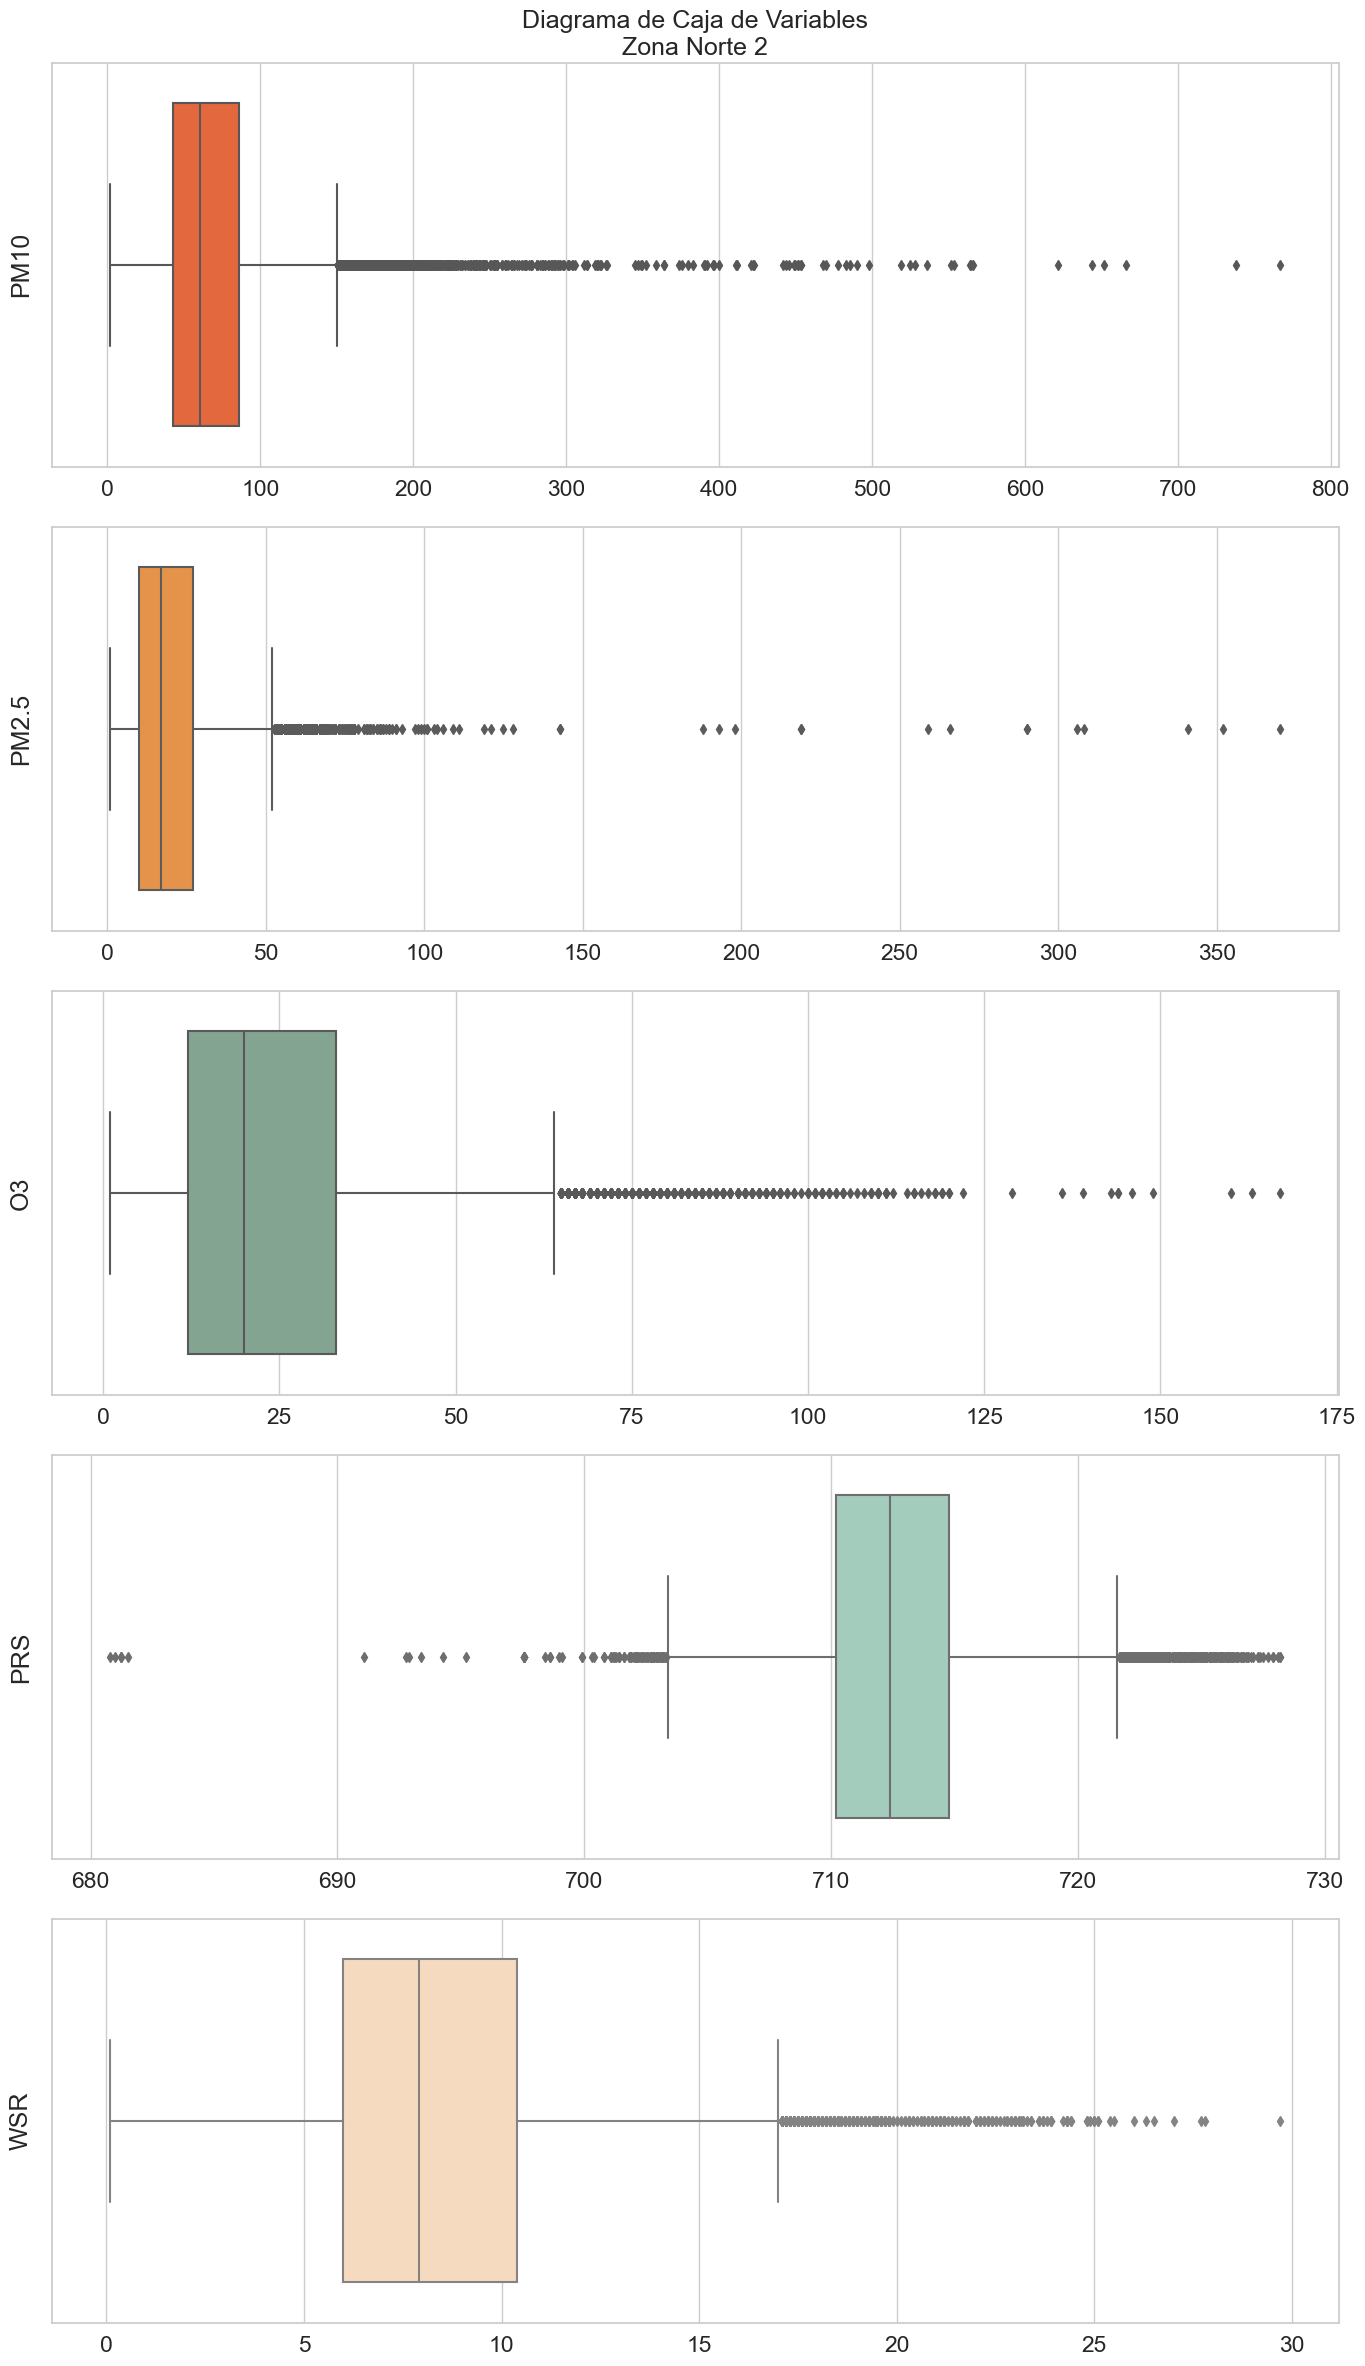

In [163]:
box_plot(
    df=df_norte2_imputado,
    interest_vars=INTEREST_VARS,
    title="Diagrama de Caja de Variables\nZona Norte 2",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

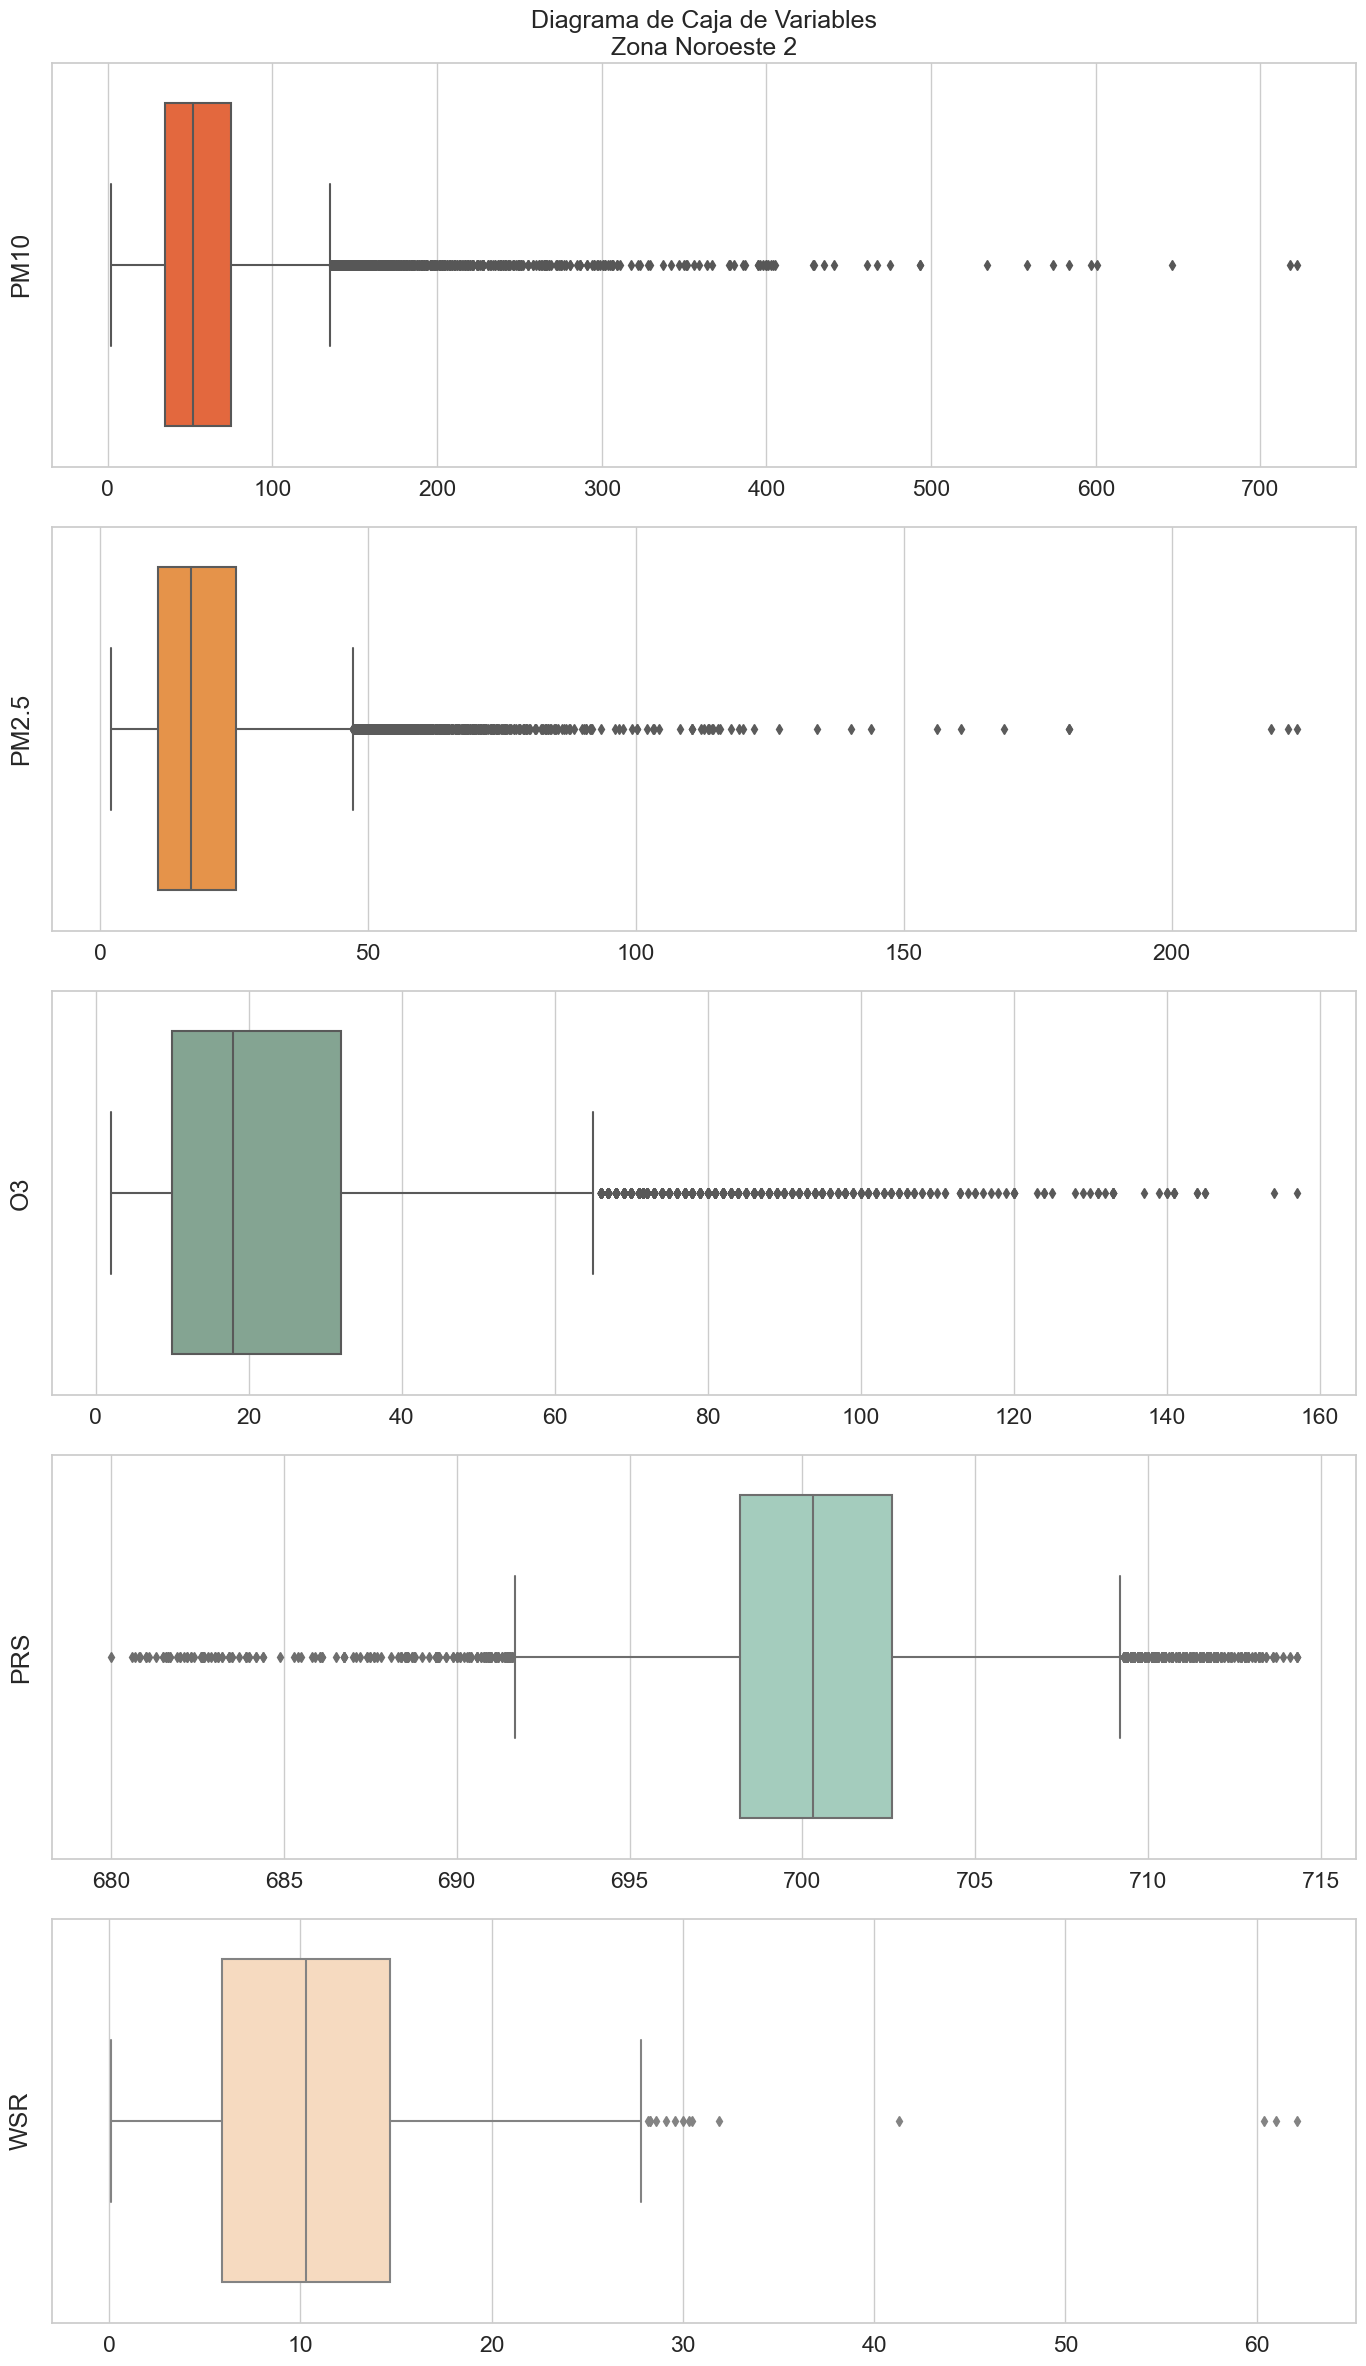

In [164]:
box_plot(
    df=df_noroeste2_imputado,
    interest_vars=INTEREST_VARS,
    title="Diagrama de Caja de Variables\nZona Noroeste 2",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

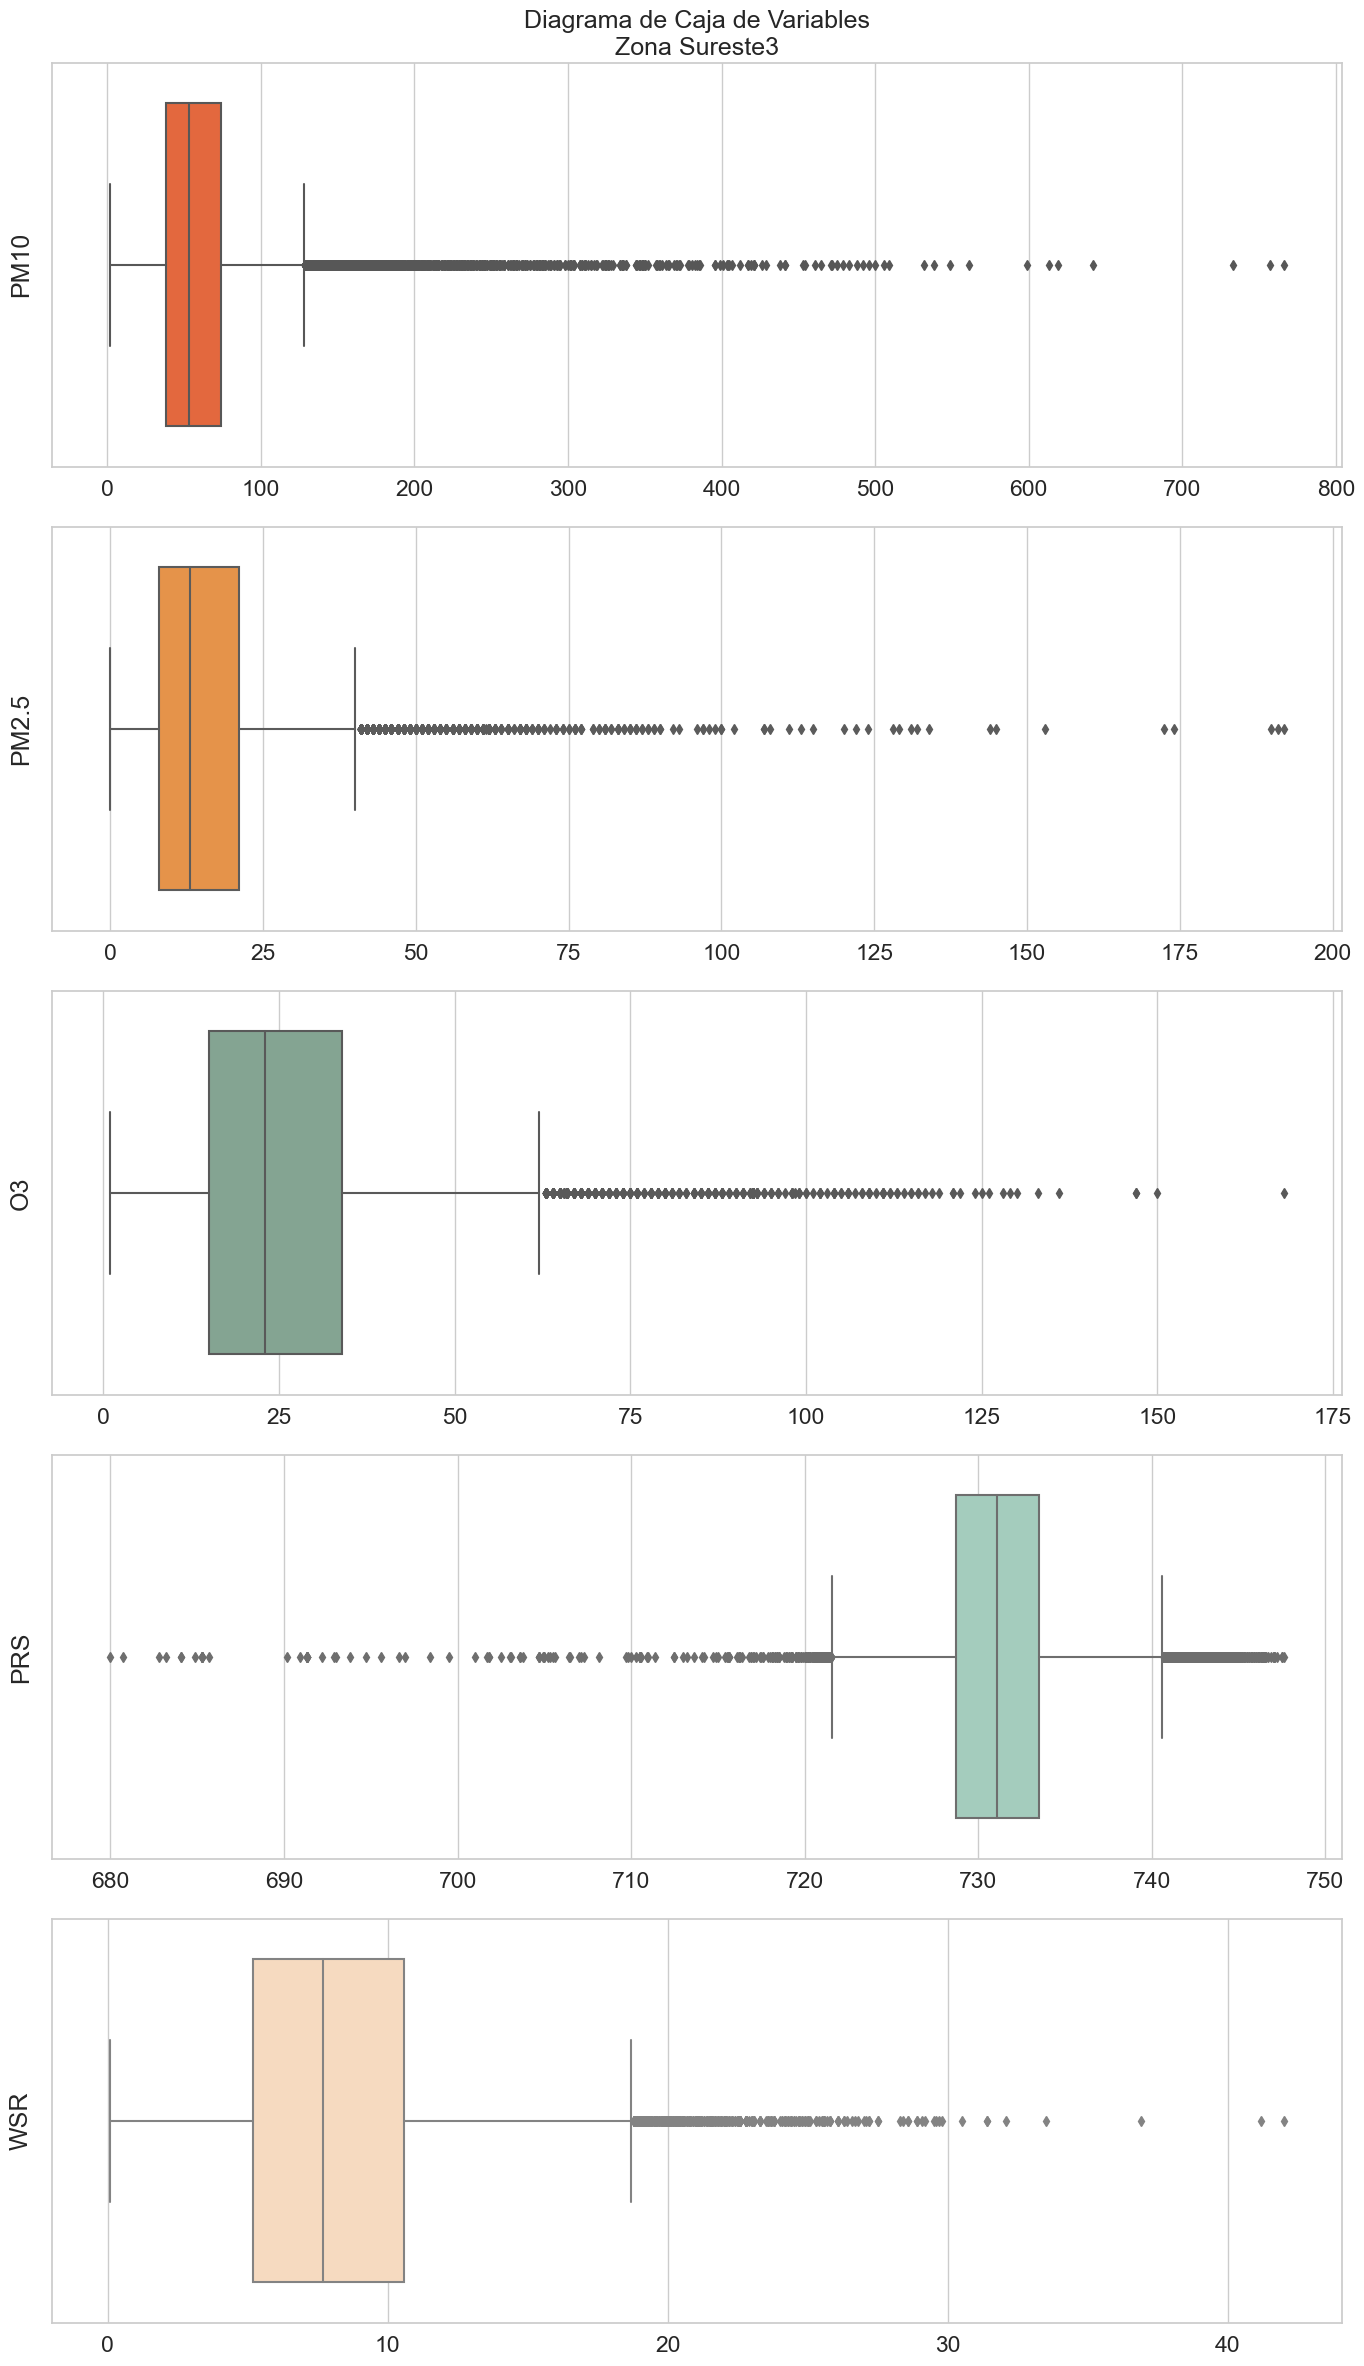

In [165]:
box_plot(
    df=df_sureste3_imputado,
    interest_vars=INTEREST_VARS,
    title="Diagrama de Caja de Variables\nZona Sureste3",
)

## Series de Tiempo

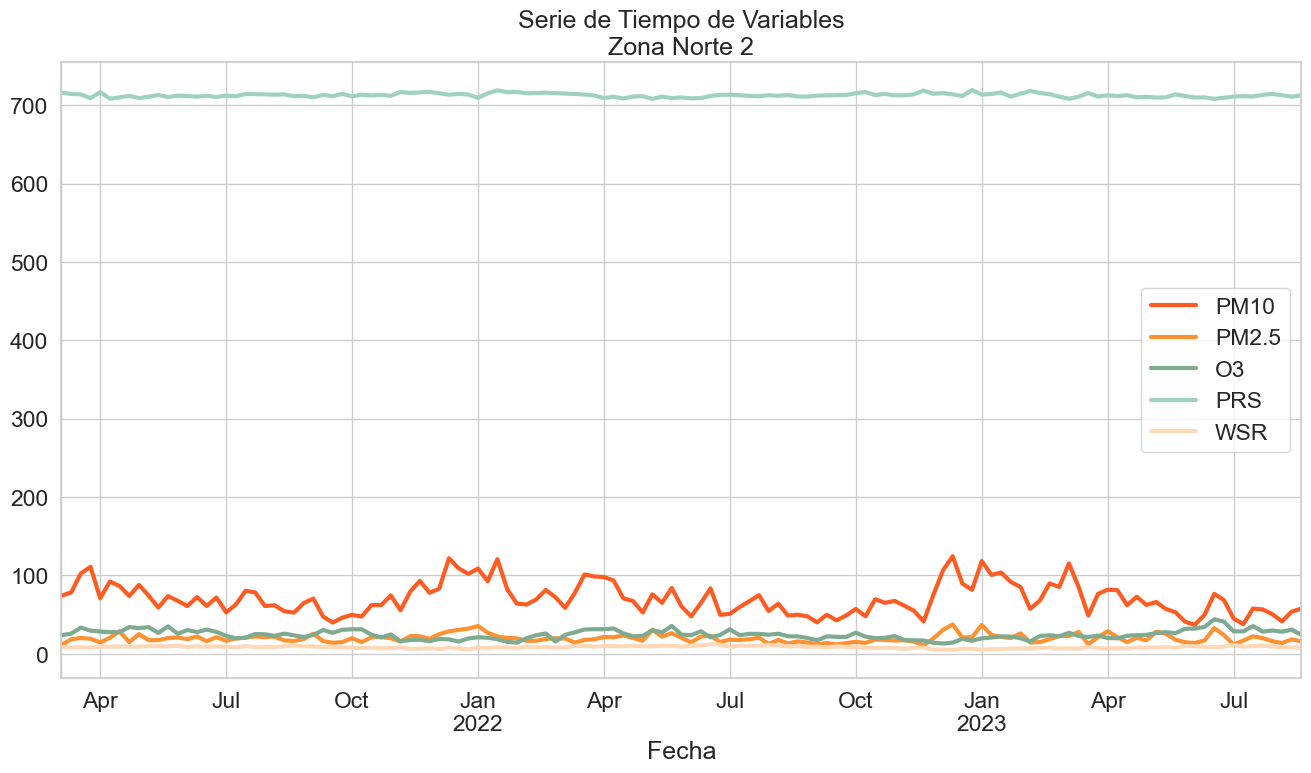

In [166]:
plot_series(
    df=df_norte2_imputado,
    title="Serie de Tiempo de Variables\nZona Norte 2",
    interest_vars=INTEREST_VARS,
    freq="W",
)

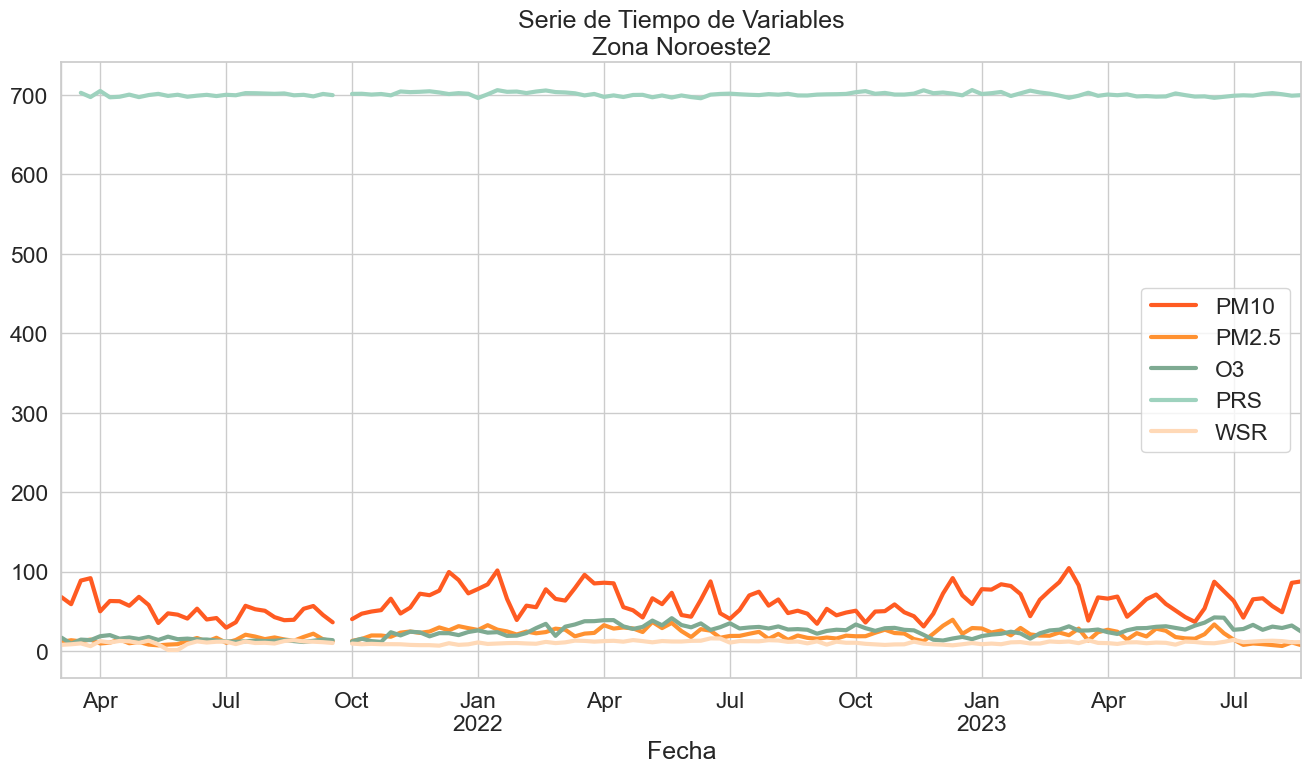

In [167]:
plot_series(
    df=df_noroeste2_fechas,
    title="Serie de Tiempo de Variables\nZona Noroeste2",
    interest_vars=INTEREST_VARS,
    freq="W",
)

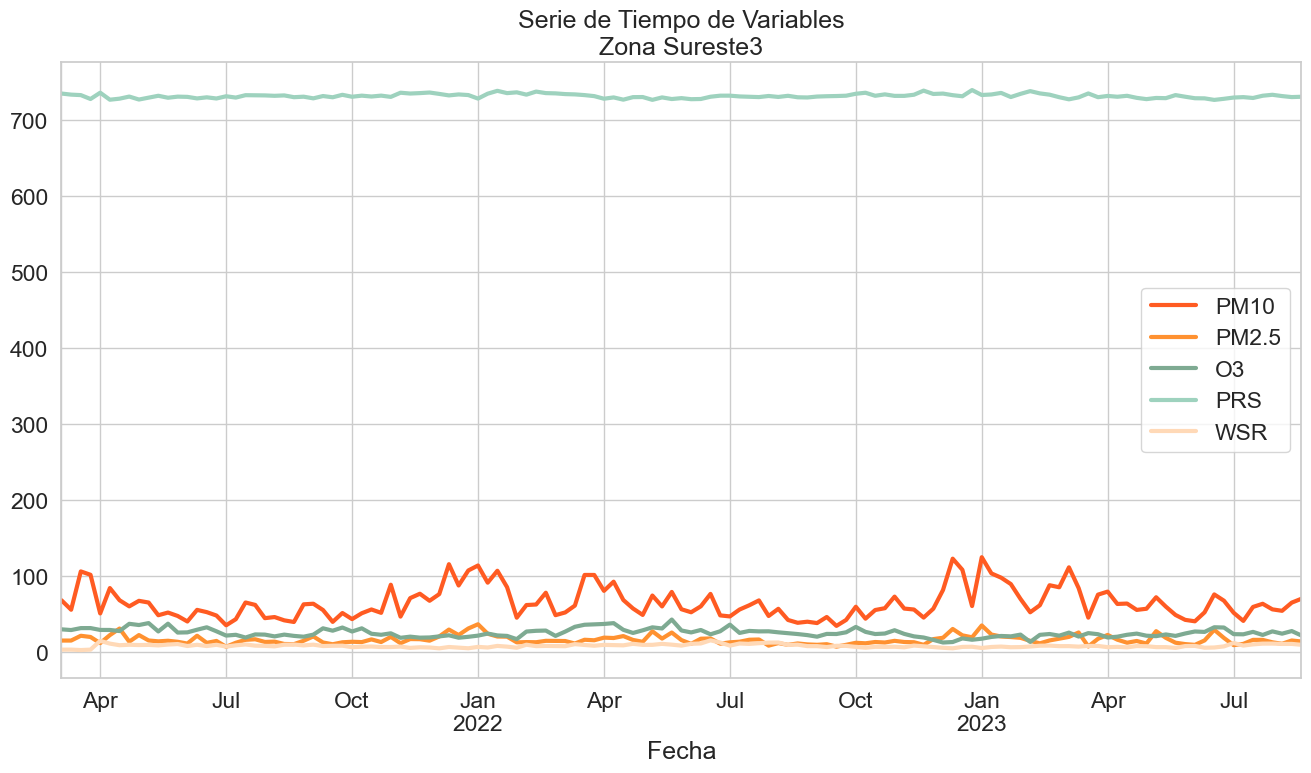

In [168]:
plot_series(
    df=df_sureste3_fechas,
    title="Serie de Tiempo de Variables\nZona Sureste3",
    interest_vars=INTEREST_VARS,
    freq="W",
)

## Histogramas Antes de Transformación

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

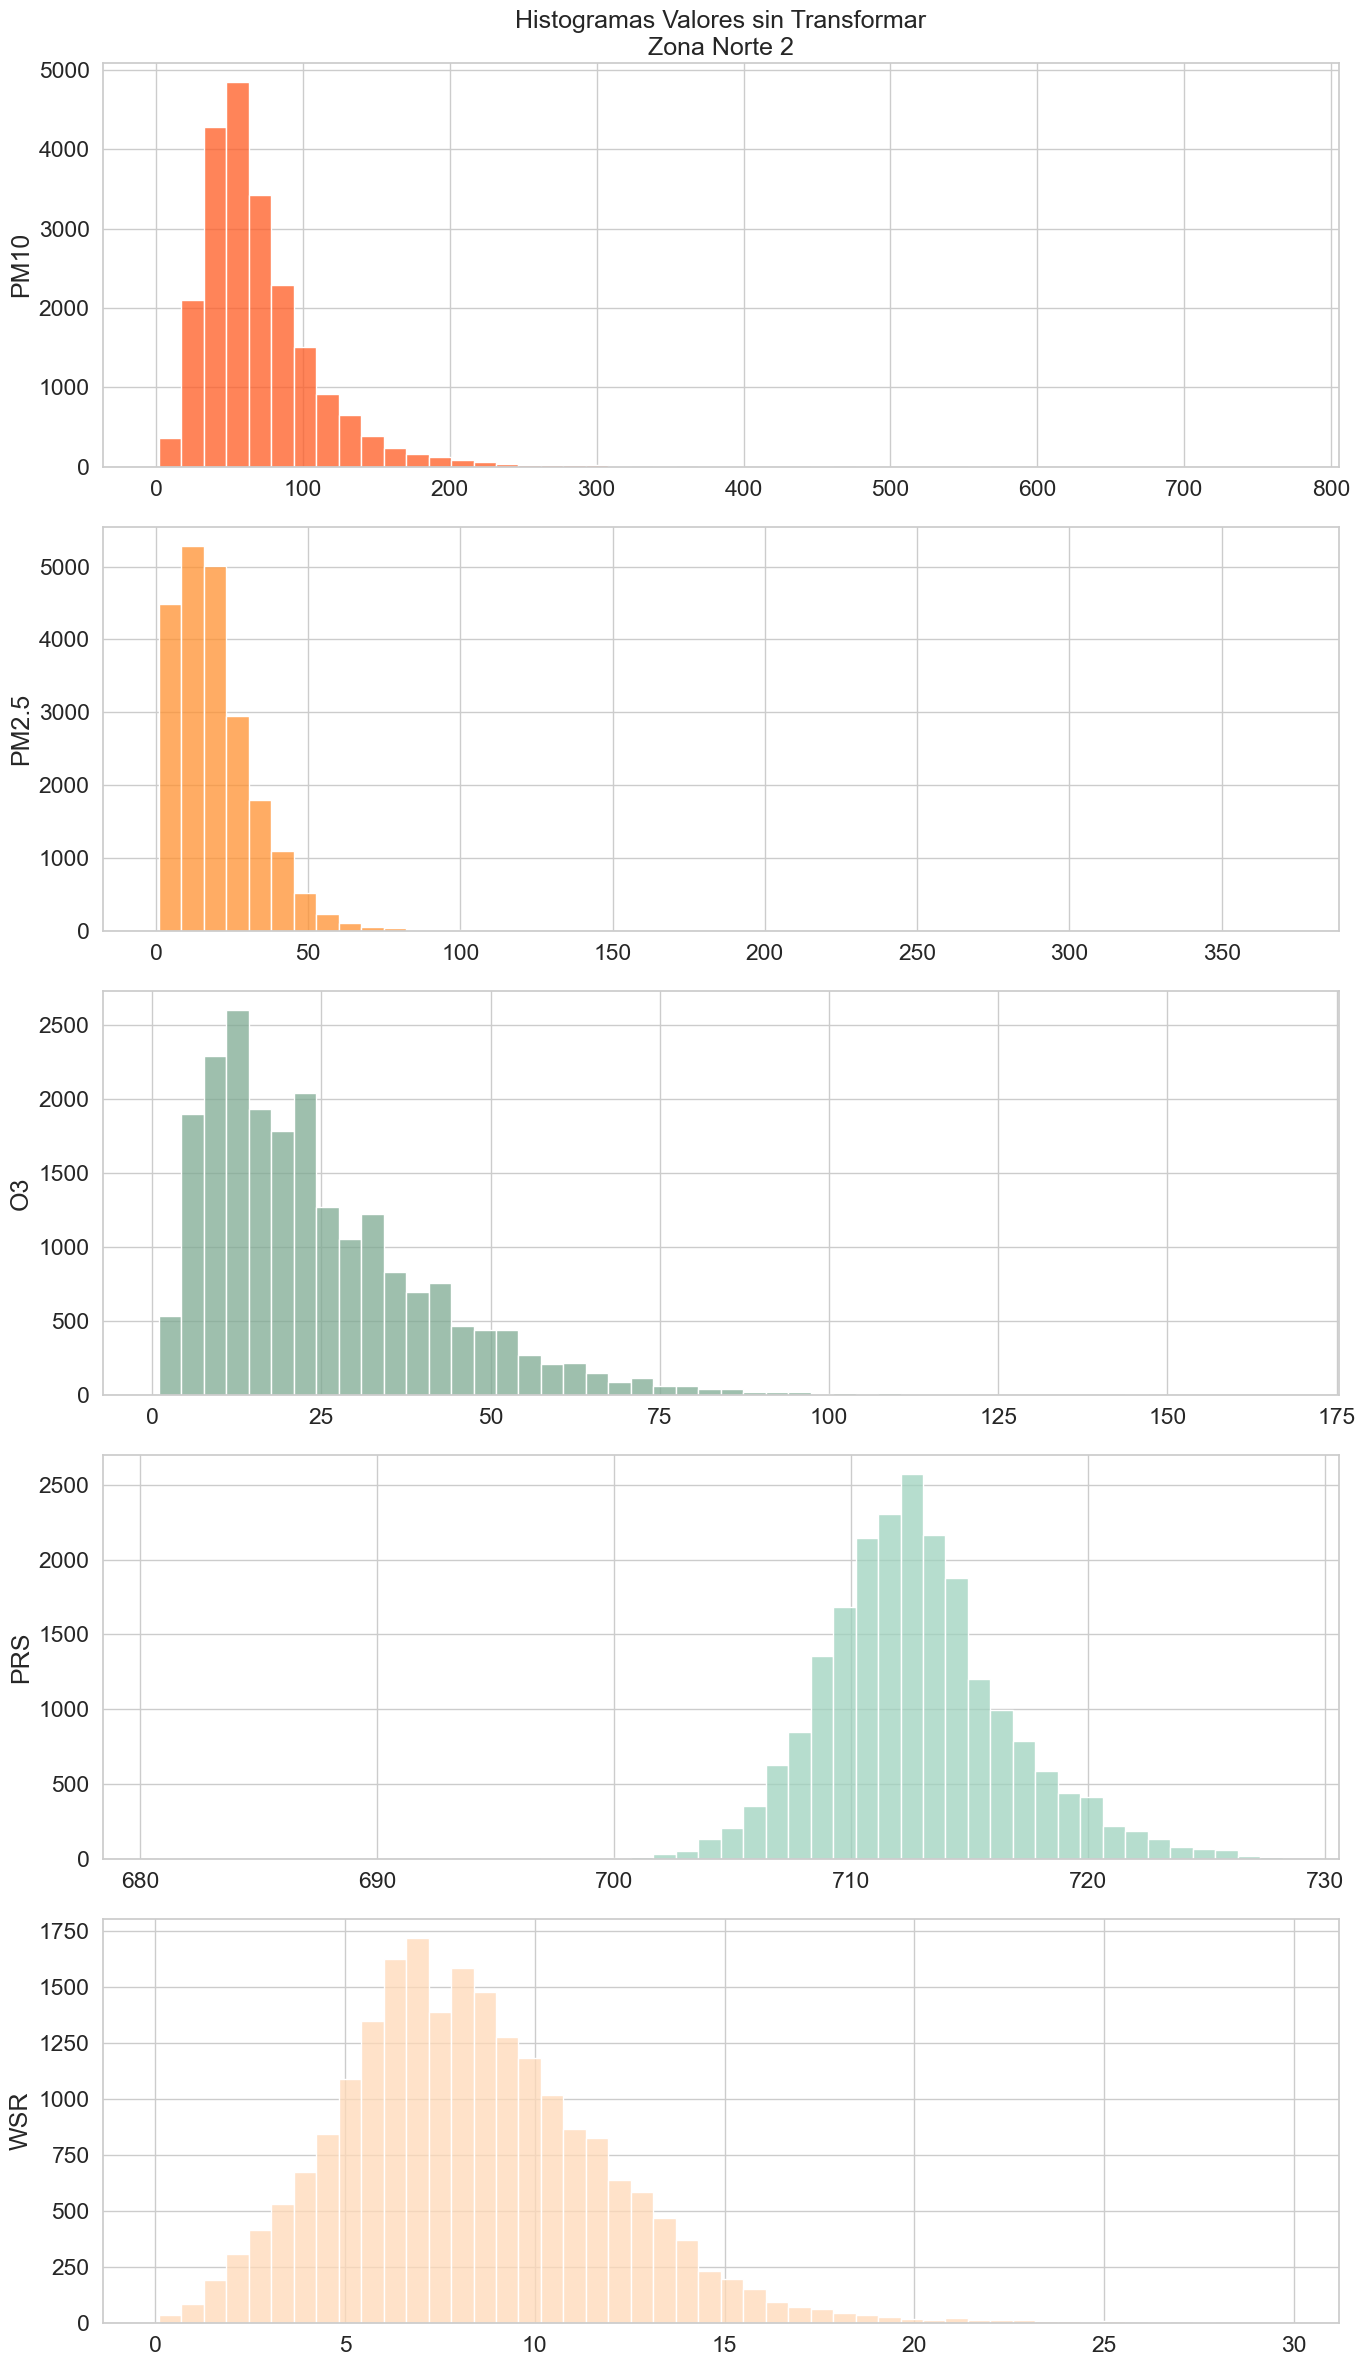

In [169]:
hist_plot(
    df_norte2_imputado,
    interest_vars=INTEREST_VARS,
    title="Histogramas Valores sin Transformar\nZona Norte 2",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

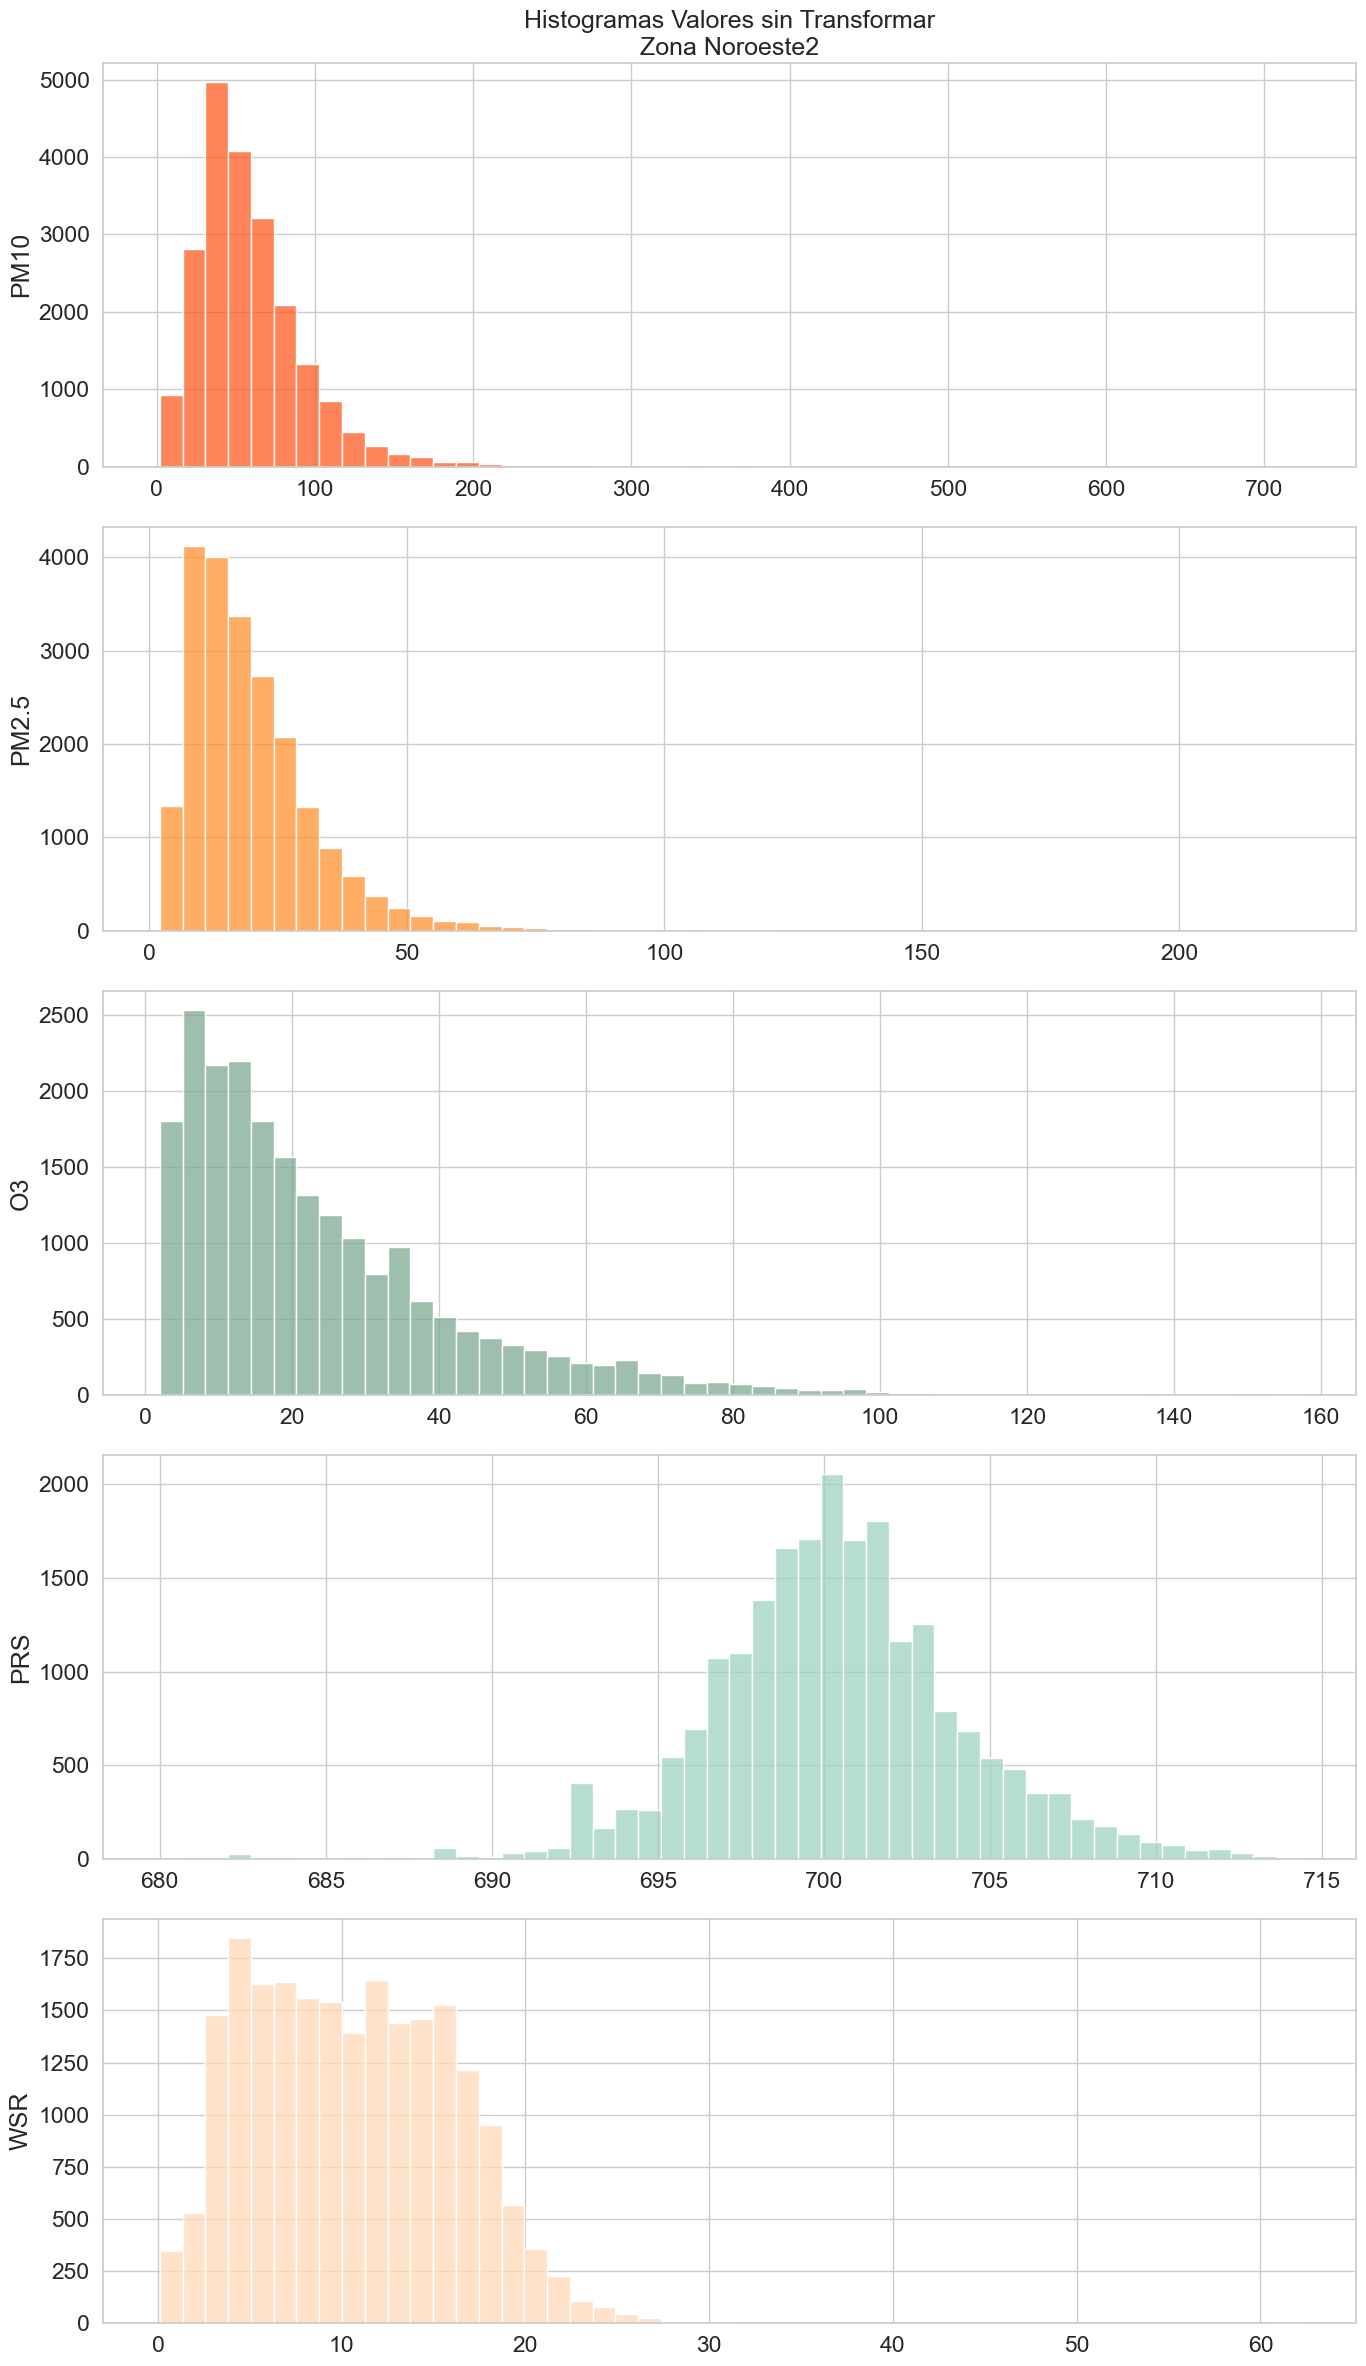

In [170]:
hist_plot(
    df_noroeste2_imputado,
    interest_vars=INTEREST_VARS,
    title="Histogramas Valores sin Transformar\nZona Noroeste2",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

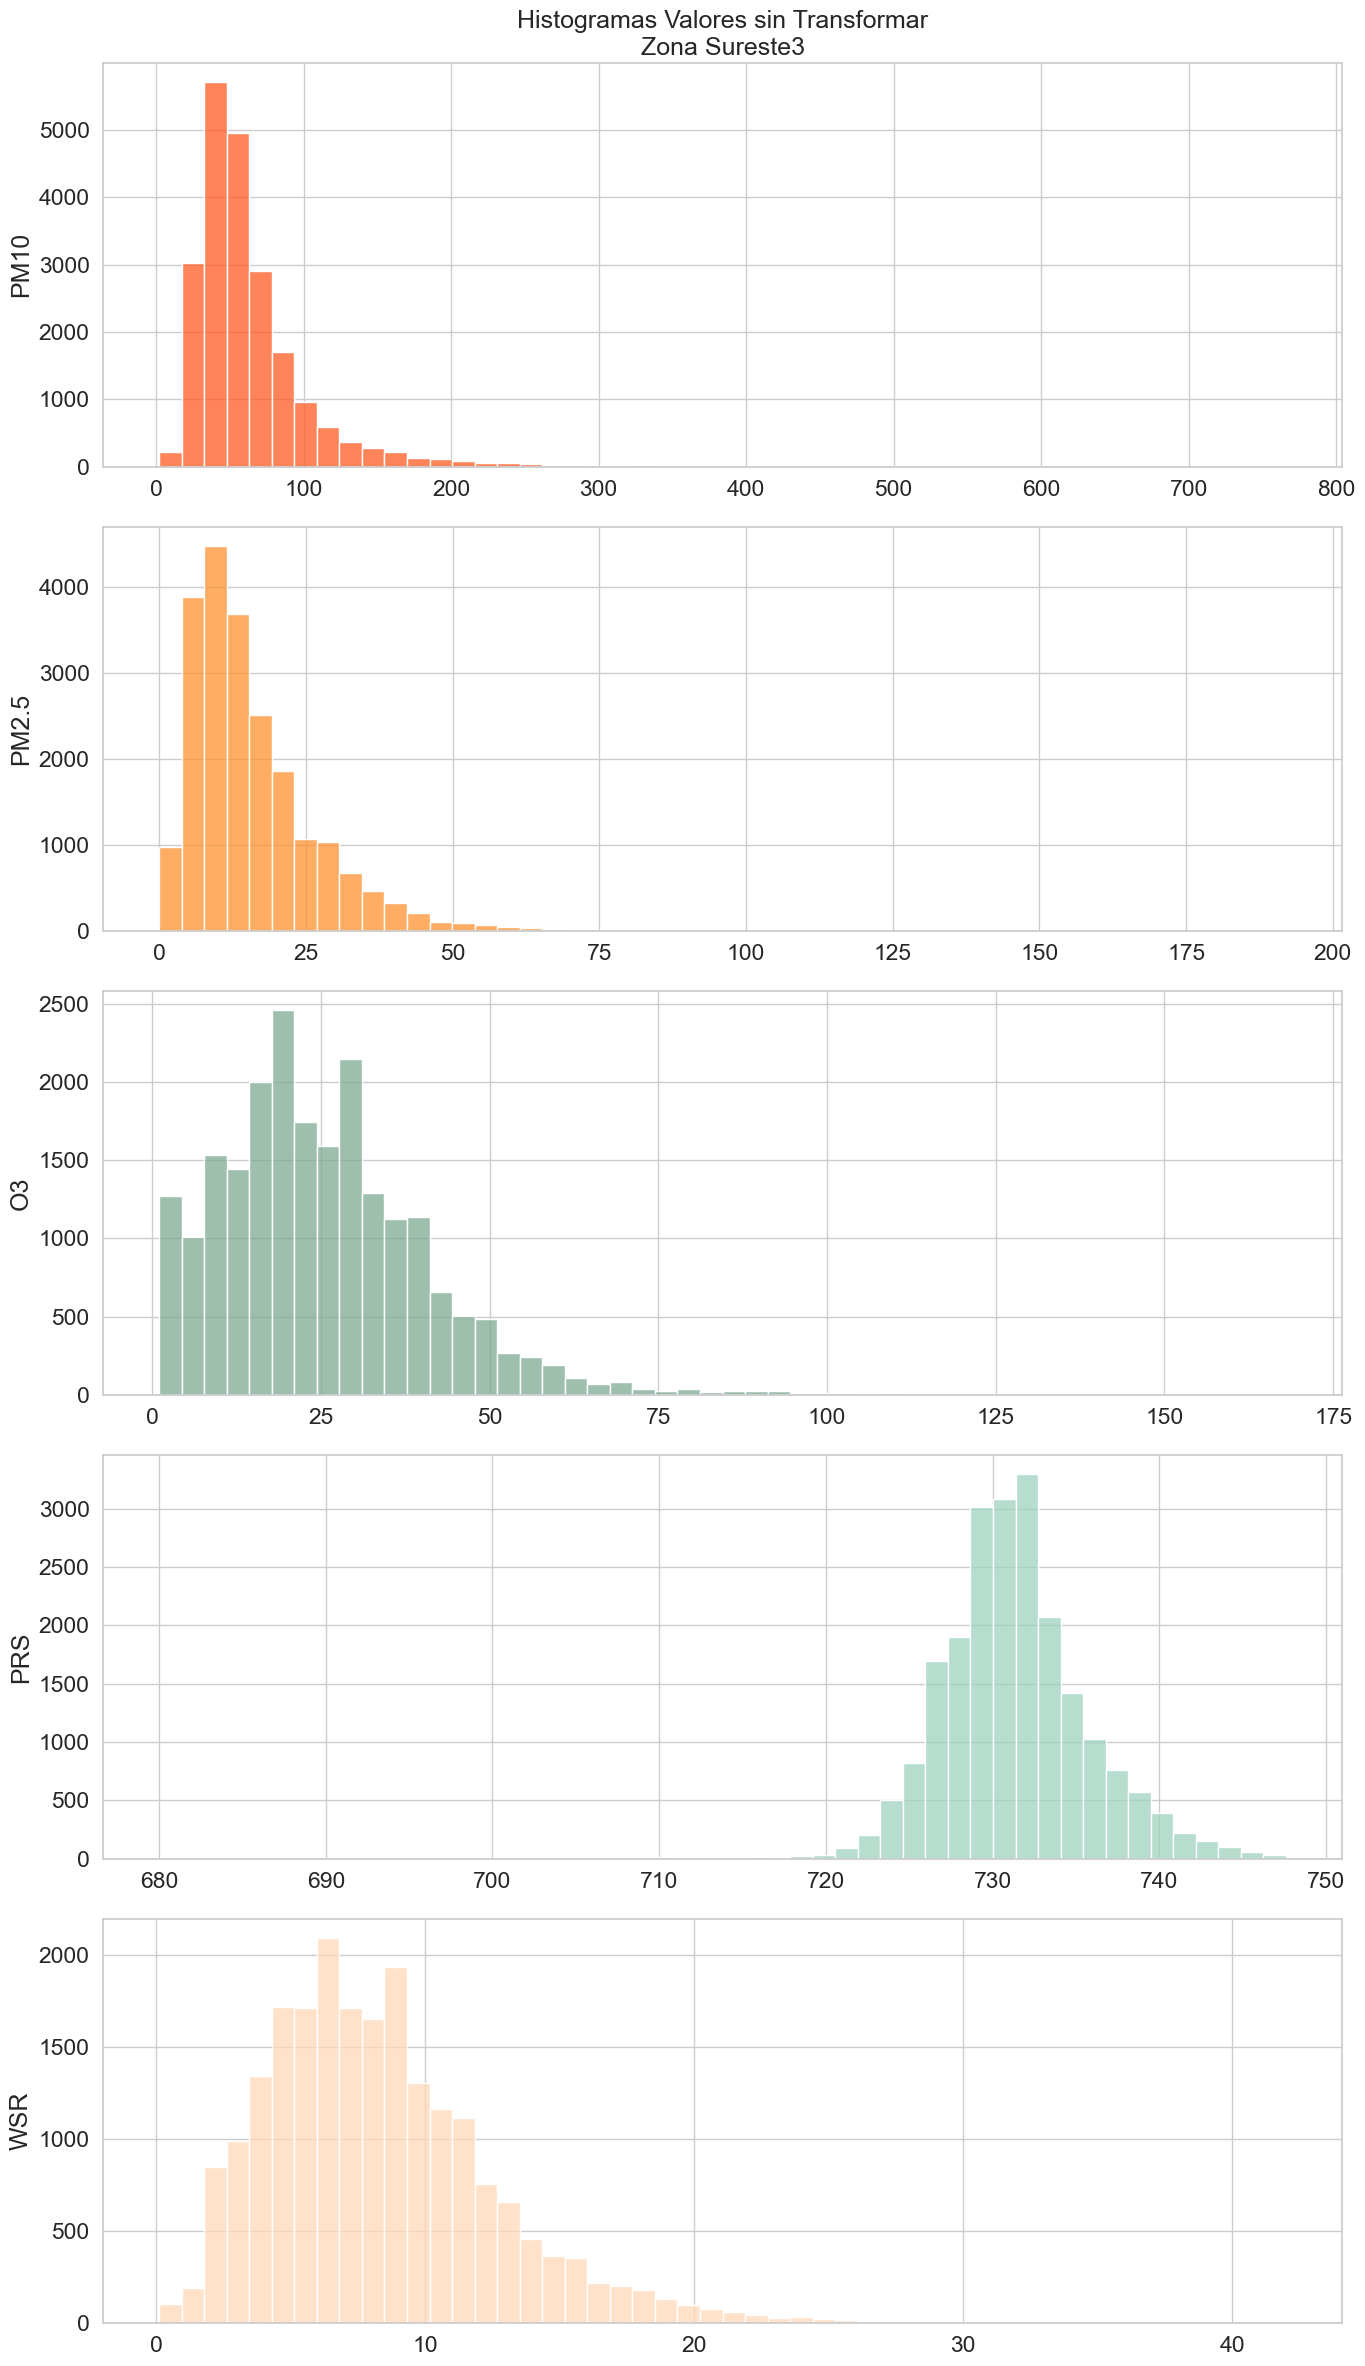

In [171]:
hist_plot(
    df_sureste3_imputado,
    interest_vars=INTEREST_VARS,
    title="Histogramas Valores sin Transformar\nZona Sureste3",
)

## Histogramas DESPUÉS de Transformación

Transformación Boxcox

In [172]:
df_norte2_transformado = df_norte2_imputado.copy()
df_norte2_transformado["PM10"], _ = boxcox(df_norte2_transformado["PM10"])
df_norte2_transformado["PM2.5"], _ = boxcox(df_norte2_transformado["PM2.5"])
df_norte2_transformado["O3"], _ = boxcox(df_norte2_transformado["O3"])
df_norte2_transformado

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
10193,2021-03-01 01:00:00,2.30,6.7,19.2,21.8,3.381454,5.974747,0.758417,709.4,0.0,57.0,1.10,0.000,24.80,5.3,93.0
10194,2021-03-01 02:00:00,2.30,11.5,19.6,27.1,2.568984,5.974747,2.137070,709.4,0.0,61.0,1.15,0.000,23.91,5.7,43.0
10195,2021-03-01 03:00:00,2.30,9.7,26.0,31.7,1.528609,5.974747,2.137070,709.2,0.0,65.0,1.15,0.000,23.11,2.6,322.0
10196,2021-03-01 04:00:00,2.32,15.1,25.4,36.5,1.186774,5.974747,2.137070,709.2,0.0,66.0,1.15,0.000,22.43,1.6,297.0
10197,2021-03-01 05:00:00,2.30,18.8,23.3,38.1,1.186774,5.974747,2.137070,709.3,0.0,68.0,1.15,0.000,21.73,1.6,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31785,2023-08-17 19:00:00,1.13,9.1,24.3,33.4,4.178815,4.680929,4.279614,709.8,0.0,19.0,3.50,0.078,37.87,8.5,83.0
31786,2023-08-17 20:00:00,1.08,7.5,24.3,31.9,3.928294,4.426369,2.745350,710.2,0.0,20.0,3.20,0.001,36.21,10.4,68.0
31787,2023-08-17 21:00:00,1.29,8.2,28.6,36.9,3.470900,4.456905,1.991425,710.6,0.0,21.0,2.90,0.000,35.49,8.4,70.0
31788,2023-08-17 22:00:00,1.10,9.4,26.9,36.3,3.636973,4.600814,2.521856,711.2,0.0,27.0,3.20,0.000,34.34,9.8,91.0


c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

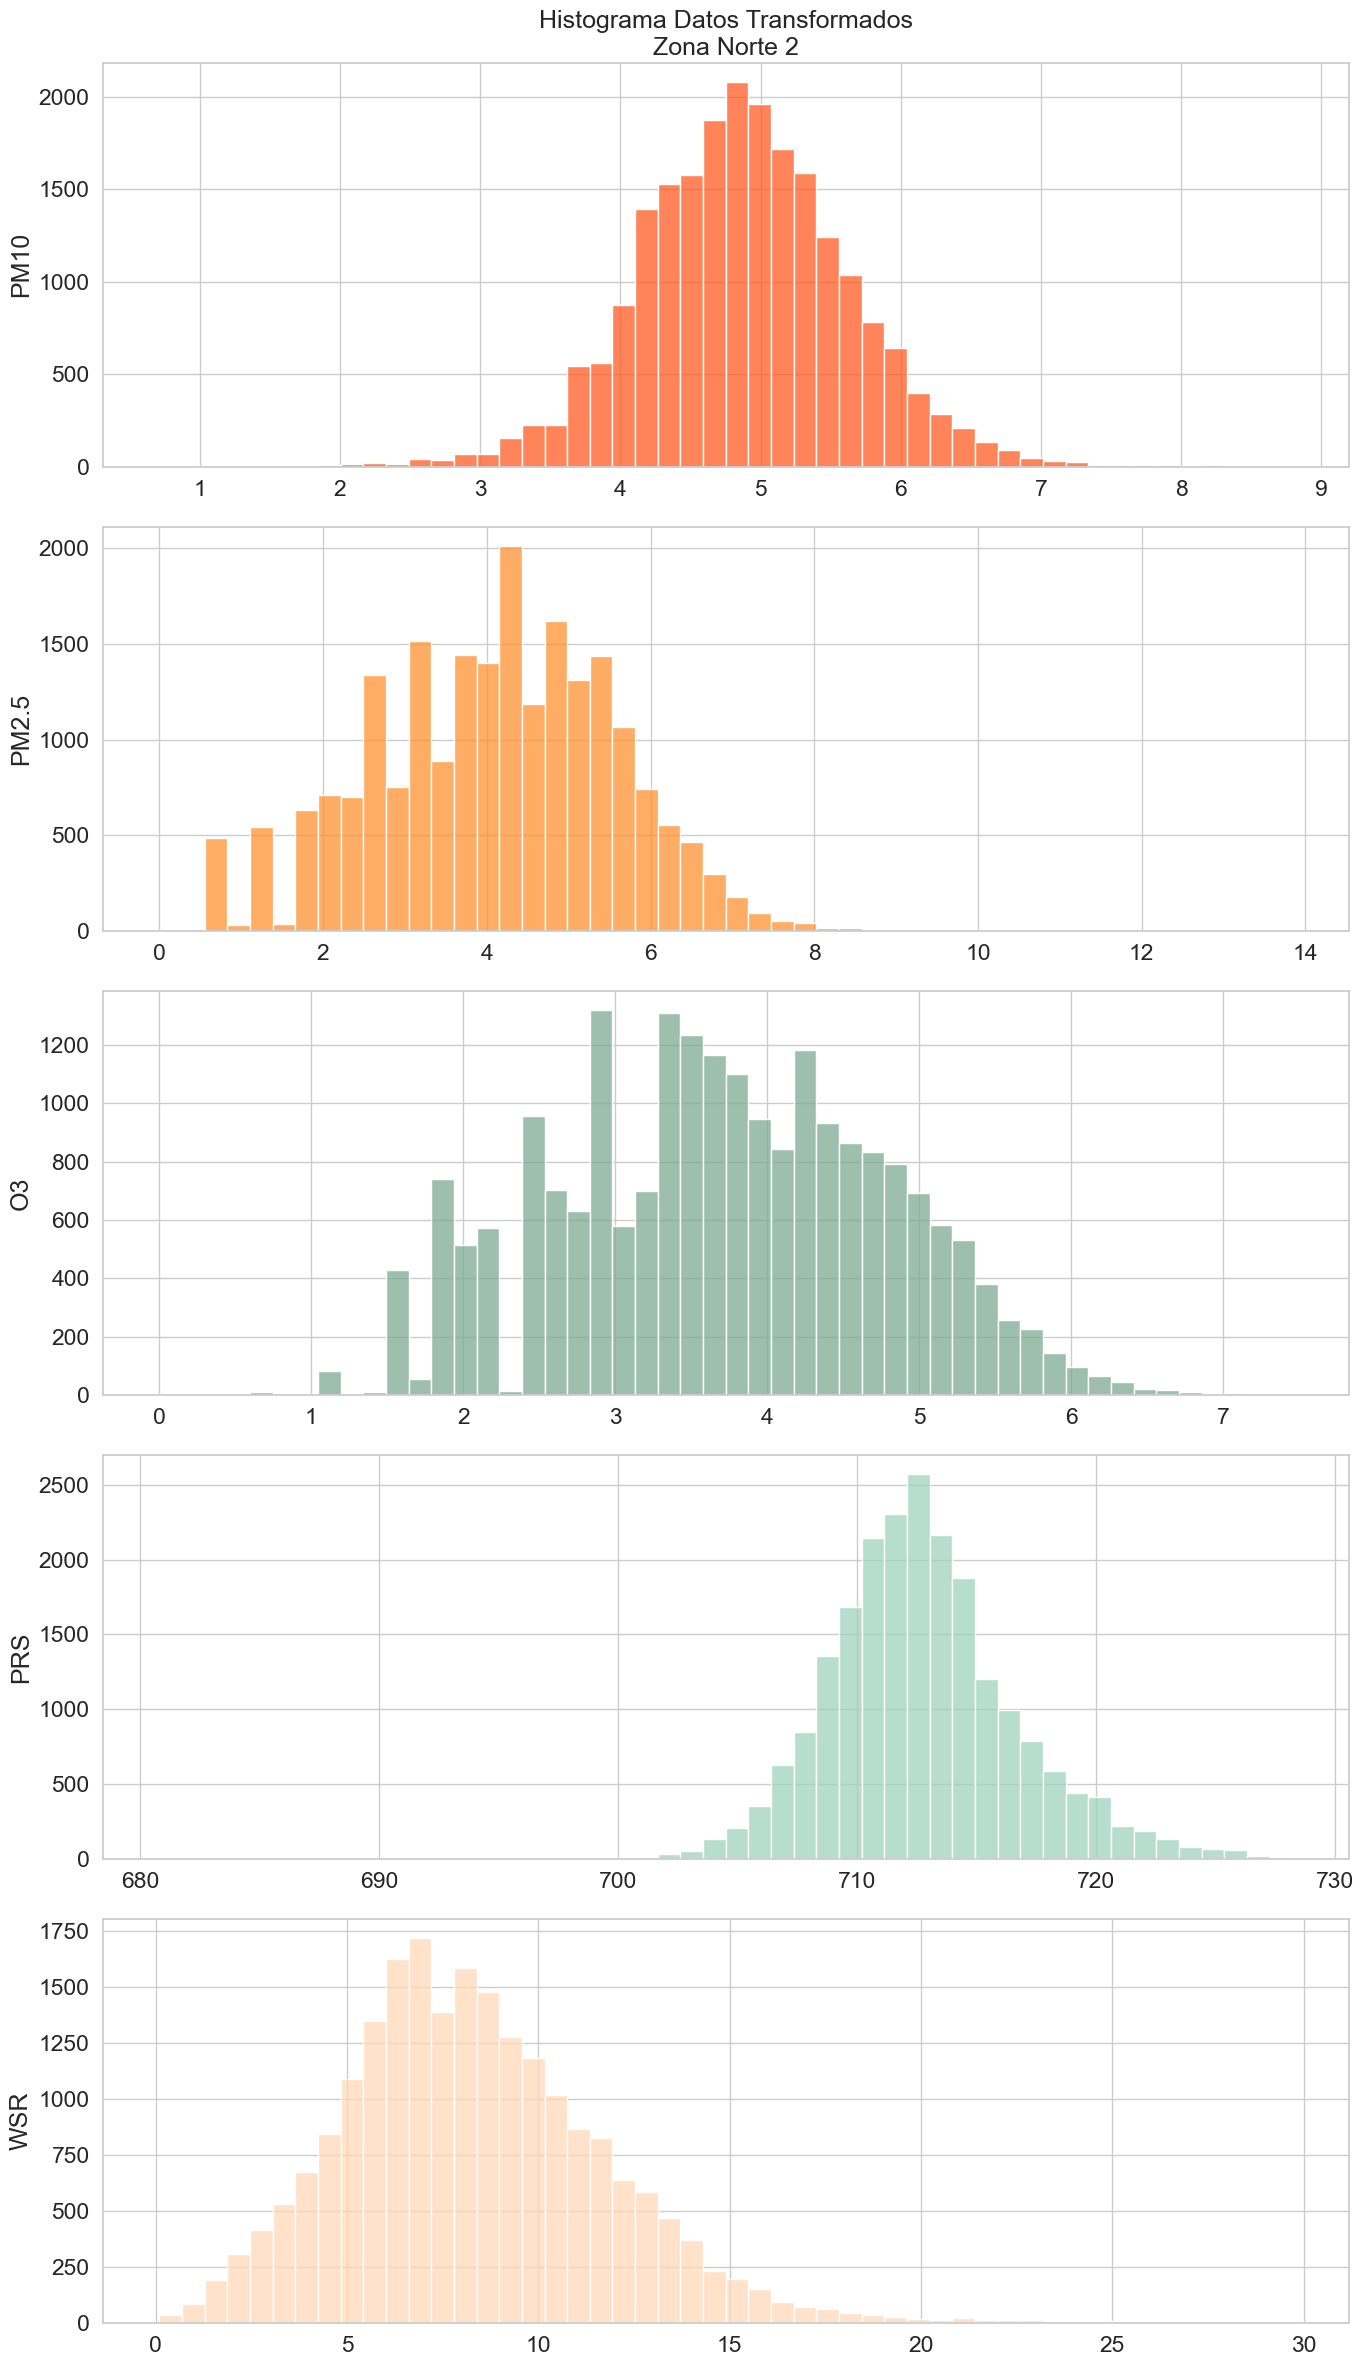

In [173]:
hist_plot(
    df_norte2_transformado,
    interest_vars=INTEREST_VARS,
    title="Histograma Datos Transformados\nZona Norte 2",
)

In [174]:
df_noroeste2_transformado = df_noroeste2_imputado.copy()
df_noroeste2_transformado["PM10"], _ = boxcox(df_noroeste2_transformado["PM10"])
df_noroeste2_transformado["PM2.5"], _ = boxcox(df_noroeste2_transformado["PM2.5"])
df_noroeste2_transformado["O3"], _ = boxcox(df_noroeste2_transformado["O3"])
df_noroeste2_transformado["WSR"], _ = boxcox(df_noroeste2_transformado["WSR"])

df_noroeste2_imputado.isna().sum()

date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

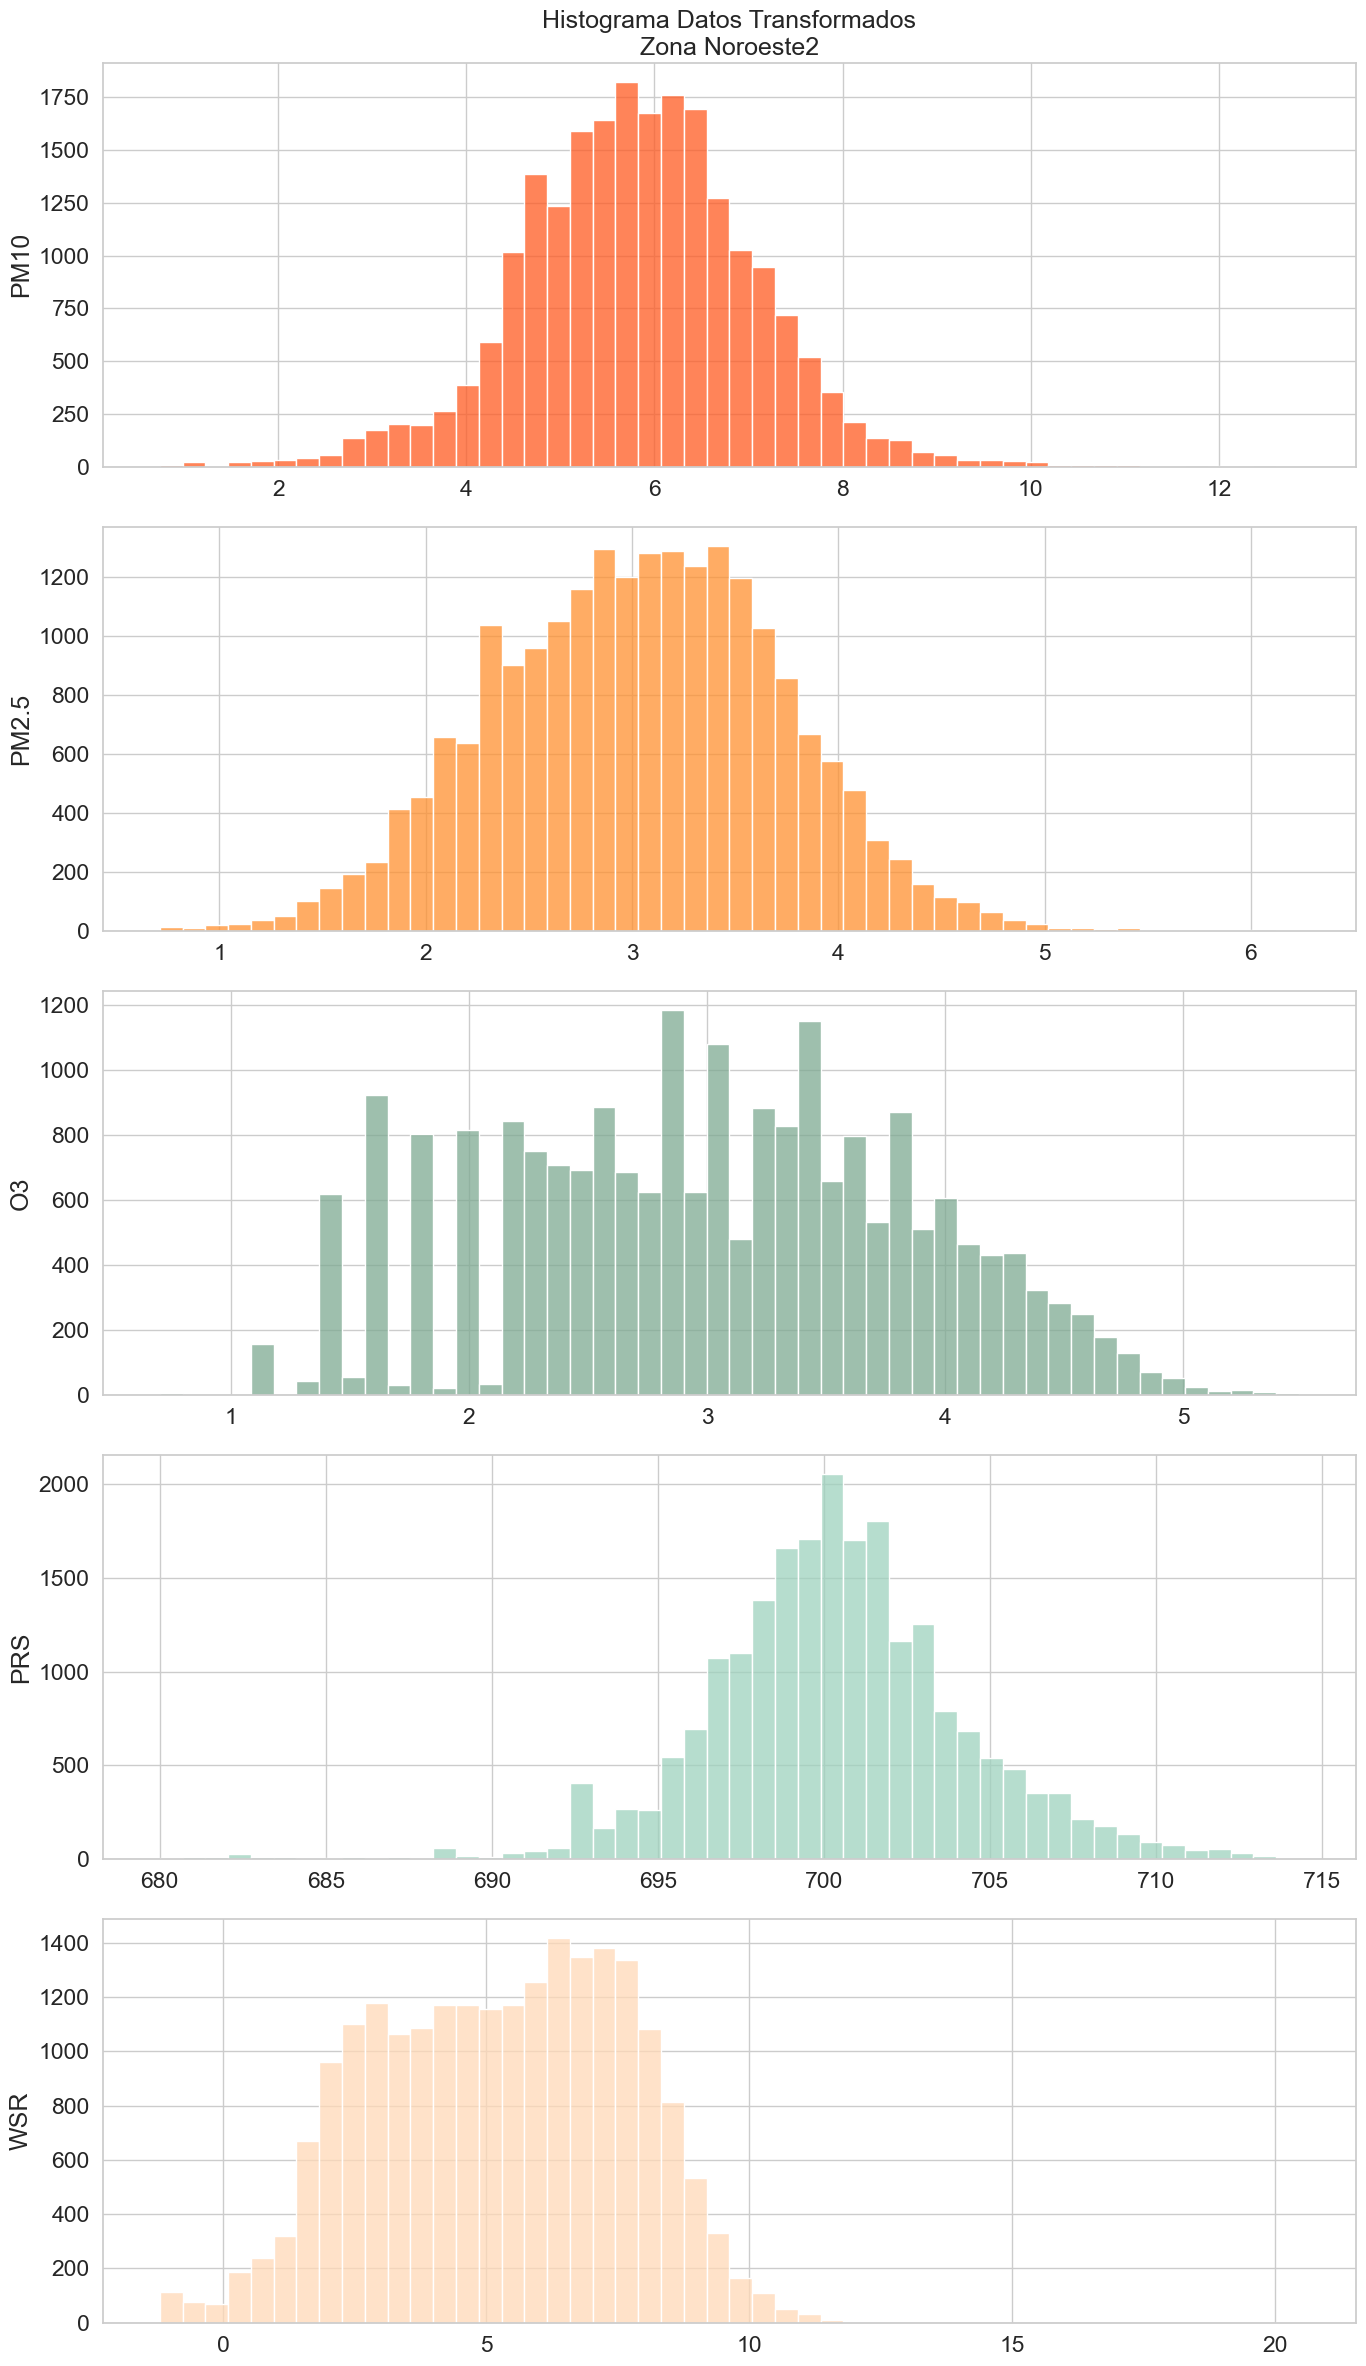

In [175]:
hist_plot(
    df_noroeste2_transformado,
    interest_vars=INTEREST_VARS,
    title="Histograma Datos Transformados\nZona Noroeste2",
)

In [176]:
df_sureste3_transformado = df_sureste3_imputado.copy()
df_sureste3_transformado.loc[
    df_sureste3_transformado["PM2.5"] == 0, "PM2.5"
] = 0.0000001
df_sureste3_transformado["PM10"], l_pm10 = boxcox(df_sureste3_transformado["PM10"])
df_sureste3_transformado["PM2.5"], l_pm25 = boxcox(df_sureste3_transformado["PM2.5"])
df_sureste3_transformado["O3"], l_o3 = boxcox(df_sureste3_transformado["O3"])
df_sureste3_transformado["WSR"], l_wsr = boxcox(df_sureste3_transformado["WSR"])

df_sureste3_transformado["PM2.5"].value_counts().sort_index()

PM2.5
-6.474508      1
 0.000000      1
 0.727293    376
 0.976586     17
 1.186035    515
            ... 
 7.496398      1
 7.514001      1
 7.694048      1
 7.704861      1
 7.715626      1
Name: count, Length: 151, dtype: int64

In [177]:
lambdas_sureste3: dict = {
    "PM10": l_pm10,
    "PM2.5": l_pm25,
    "O3": l_o3,
    "WSR": l_wsr,
}

lambdas_sureste3

{'PM10': -0.18284997009050546,
 'PM2.5': 0.13765609475581927,
 'O3': 0.42868842587540795,
 'WSR': 0.3919662384356234}

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:111

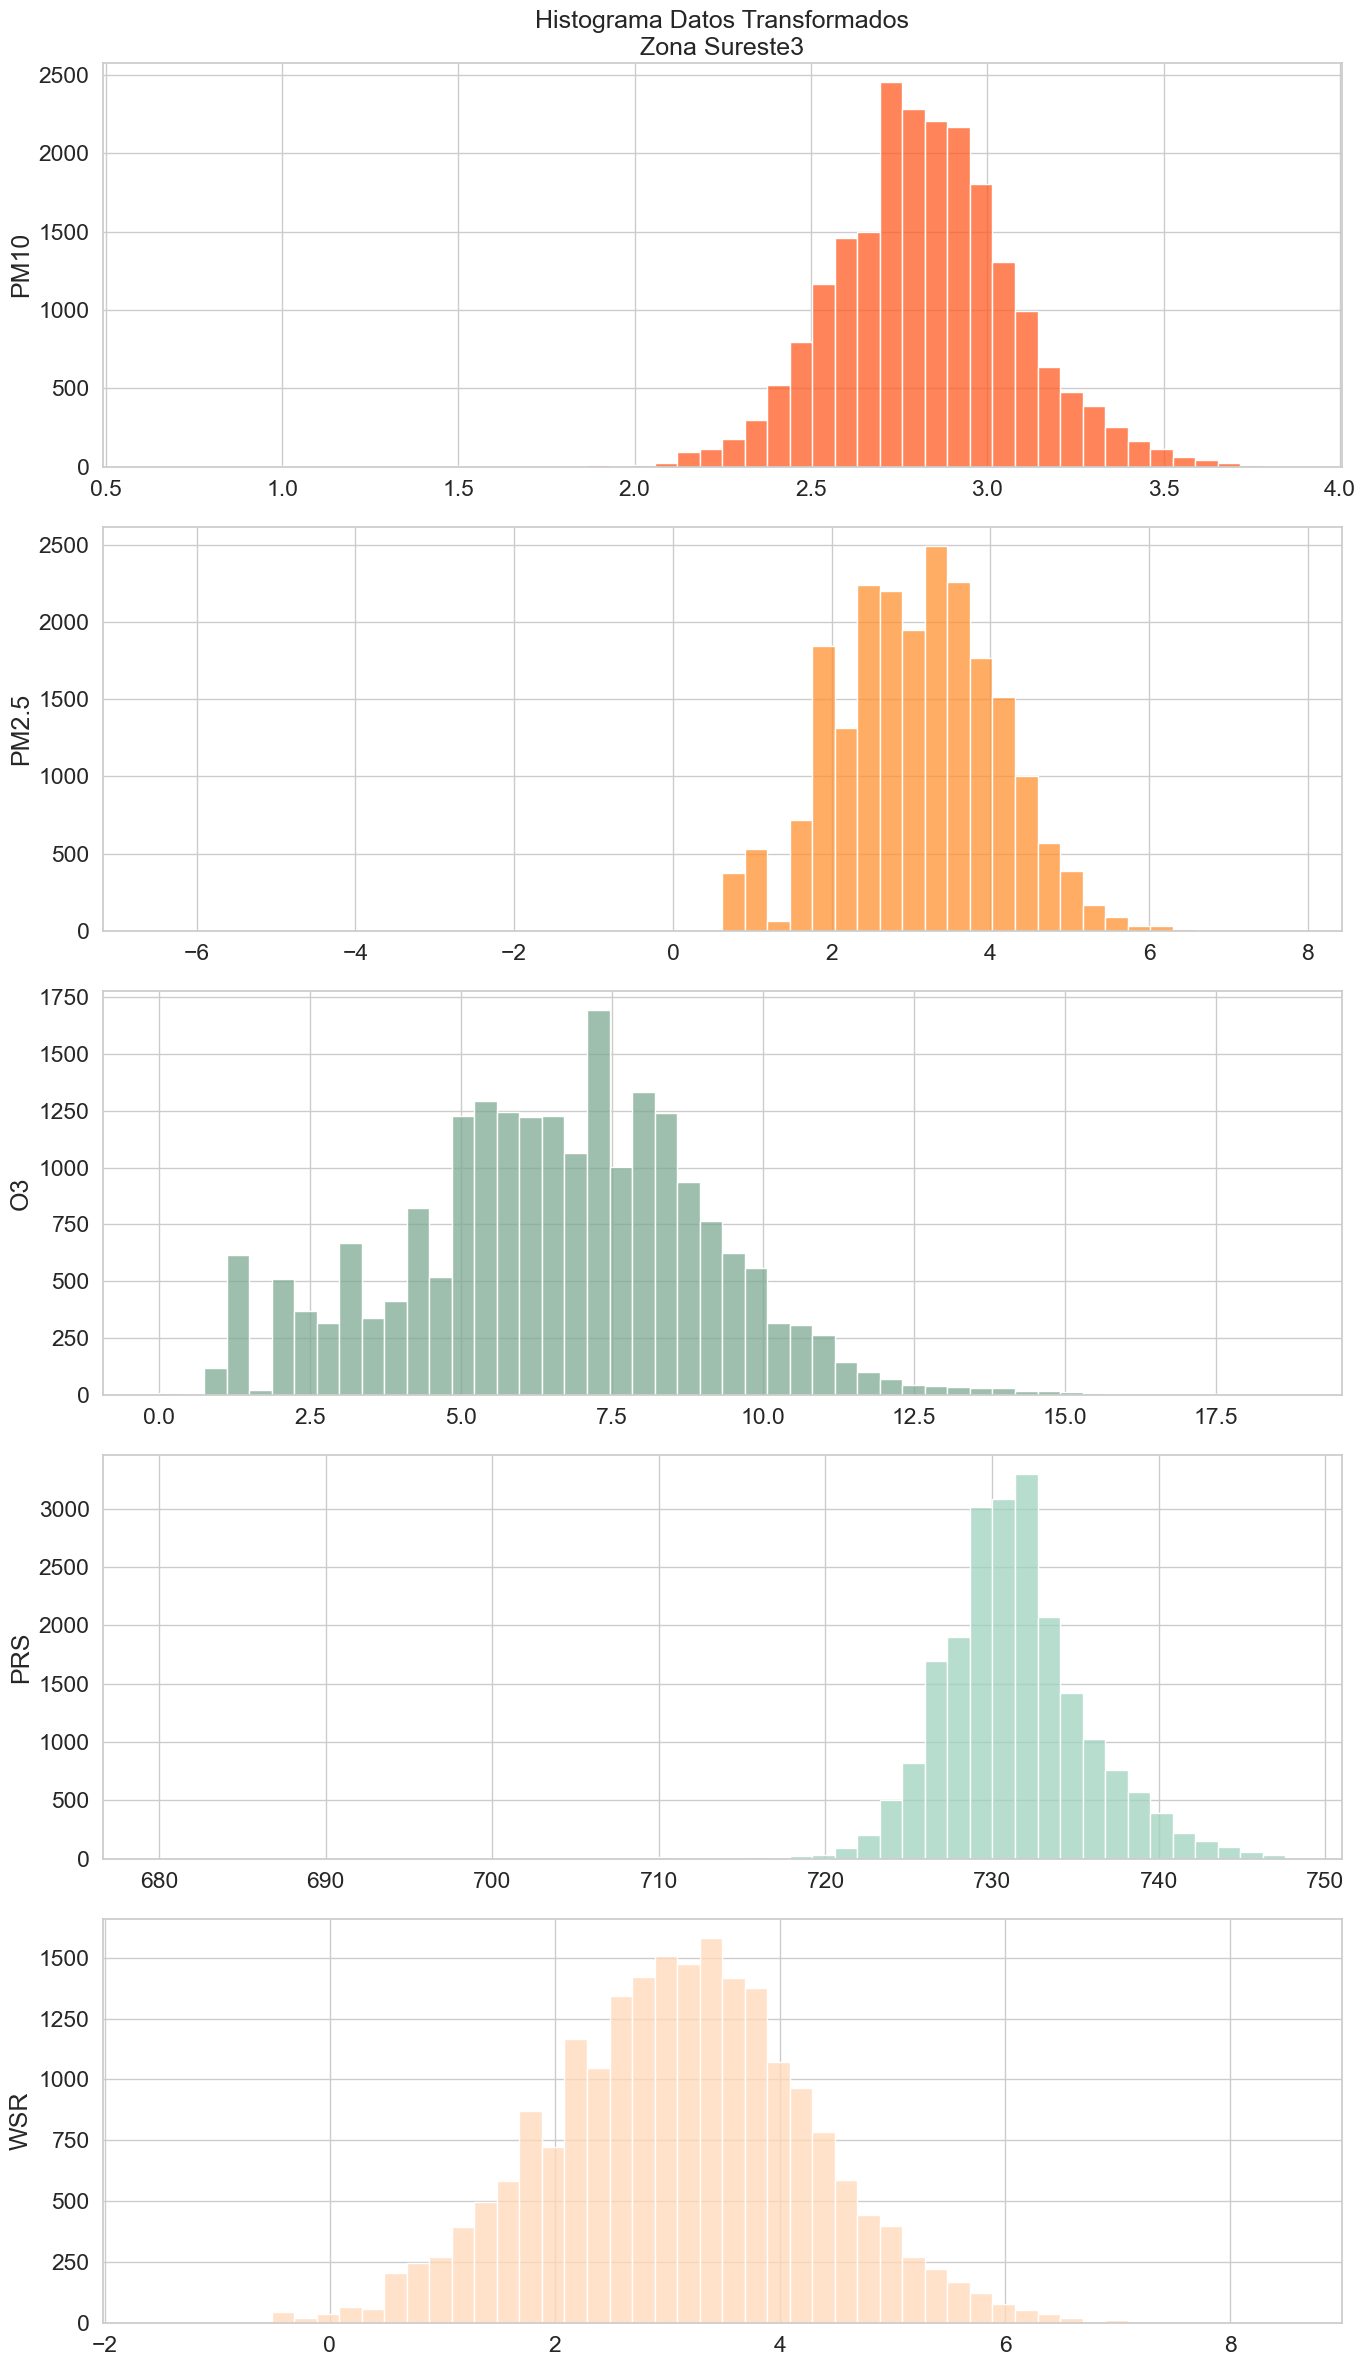

In [178]:
hist_plot(
    df_sureste3_transformado,
    interest_vars=INTEREST_VARS,
    title="Histograma Datos Transformados\nZona Sureste3",
)

In [179]:
df_norte2_transformado.to_csv(
    "../transformed_datasets/NORTE2_2021_2023_BOXCOX.csv", index=False
)
df_noroeste2_transformado.to_csv(
    "../transformed_datasets/NOROESTE2_2021_2023_BOXCOX.csv", index=False
)
df_sureste3_transformado.to_csv(
    "../transformed_datasets/SURESTE3_2021_2023_BOXCOX.csv", index=False
)